In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [90]:
#copied class to the csv file and loaded as a single file
df1 = pd.read_csv("customer_segmentation_buy_will_not_buy_clustering.csv",low_memory=False)
df2=pd.read_excel("customer_segmentatation_class.xlsx")

In [91]:
df2

,target
0,Will Not Buy
1,Will Not Buy
2,Will Not Buy
3,Will Not Buy
4,Buy
...,...
99996,Will Not Buy
99997,Will Not Buy
99998,Will Not Buy
99999,Will Not Buy


In [92]:
df1.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,d,4.5563,...,13.1539,11.0811,11.6745,11.7116,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099
1,-12.249,13.9036,7.1043,3.9408,0.6942,2.724,7.0987,-2.0057,d,7.8754,...,11.3166,12.9463,11.3405,12.8791,-31.0154,8.3203,-2.416,25.8155,11.5302,12.4252
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.048,11.2321,0.8326,f,7.4749,...,15.8862,12.0839,11.4469,5.8048,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,f,8.5139,...,15.387,11.2476,11.1353,11.8147,-39.1025,12.8864,-20.0529,19.279,17.9902,12.8956
4,-0.1273,13.6008,7.5372,8.6179,5.092,2.8564,12.0897,-4.7146,d,7.3956,...,12.7873,11.8687,11.6574,4.3396,18.2998,14.4215,-0.6626,2.3012,20.8598,12.6211


In [93]:
df1.ndim

2

In [94]:
#combine both df and df2
df = pd.concat([df1,df2], axis=1)

In [95]:
df

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item36,item37,item38,item39,item40,item41,item42,item43,item44,target
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,d,4.5563,...,11.0811,11.6745,11.7116,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099,Will Not Buy
1,-12.249,13.9036,7.1043,3.9408,0.6942,2.724,7.0987,-2.0057,d,7.8754,...,12.9463,11.3405,12.8791,-31.0154,8.3203,-2.416,25.8155,11.5302,12.4252,Will Not Buy
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.048,11.2321,0.8326,f,7.4749,...,12.0839,11.4469,5.8048,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176,Will Not Buy
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,f,8.5139,...,11.2476,11.1353,11.8147,-39.1025,12.8864,-20.0529,19.279,17.9902,12.8956,Will Not Buy
4,-0.1273,13.6008,7.5372,8.6179,5.092,2.8564,12.0897,-4.7146,d,7.3956,...,11.8687,11.6574,4.3396,18.2998,14.4215,-0.6626,2.3012,20.8598,12.6211,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,-9.5348,13.986,5.2982,8.2705,1.0914,3.2326,11.488,-0.4956,d,3.5142,...,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.411,Will Not Buy
99997,-11.8776,14.4131,3.3087,3.5800,0.8982,2.2532,4.9149,-2.4484,f,6.6345,...,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.691,Will Not Buy
99998,-0.4651,13.8775,9.7414,10.9044,3.1008,2.1497,11.2232,-5.0518,f,5.6456,...,11.2566,11.4025,11.8492,-49.5007,7.4376,-21.2946,16.5701,15.9192,11.4688,Will Not Buy
99999,0.7086,14.211,6.5641,7.6177,5.5803,3.7091,9.7148,-8.6098,f,5.793,...,10.7766,11.6900,12.9929,-42.9704,12.7881,4.4044,27.088,14.0471,13.4318,Will Not Buy


In [96]:
df.describe()

,item4,item13,item23,item26,item28,item29,item30,item36,item37,item38,item39,item43
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,10.529625,5.410733,5.049654,-0.524211,11.432680,3.845828,2.184148,11.222831,11.570013,8.965875,-13.116952,16.694053
std,14.158835,0.868705,2.614305,2.584769,0.542273,5.164112,3.119673,0.696035,0.309482,7.216663,23.311754,7.868070
min,1.216700,2.347300,-3.929200,-8.084300,9.842500,-16.513600,-7.637900,8.859000,10.652800,-9.939600,-144.032400,-6.977700
25%,5.796900,4.765600,3.167000,-2.511600,11.030500,0.159900,-0.009600,10.711300,11.344200,5.319600,-28.672100,10.653400
50%,7.527700,5.384800,4.948700,-0.500800,11.432600,3.915700,2.183500,11.244500,11.564300,9.433100,-12.504600,16.662400
75%,9.270200,6.007000,6.795200,1.458500,11.843100,7.486800,4.453200,11.759400,11.804300,13.086100,3.150600,22.564900
max,72.546800,8.433000,13.125700,6.696400,13.287800,20.382300,13.283800,13.469600,12.577900,1324.665000,142.247800,41.153000


In [97]:
df.shape

(100001, 45)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 45 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   item1   100001 non-null  object 
 1   item2   100001 non-null  object 
 2   item3   100001 non-null  object 
 3   item4   100001 non-null  float64
 4   item5   100001 non-null  object 
 5   item6   100001 non-null  object 
 6   item7   100001 non-null  object 
 7   item8   100001 non-null  object 
 8   item9   100001 non-null  object 
 9   item10  100001 non-null  object 
 10  item11  100001 non-null  object 
 11  item12  100001 non-null  object 
 12  item13  100001 non-null  float64
 13  item14  100001 non-null  object 
 14  item15  100001 non-null  object 
 15  item16  100001 non-null  object 
 16  item17  100001 non-null  object 
 17  item18  100001 non-null  object 
 18  item19  100001 non-null  object 
 19  item20  100001 non-null  object 
 20  item21  100001 non-null  object 
 21  item22  10

In [99]:
#find the unique values in the data frame
df.nunique()

item1     79406
item2      9171
item3     74185
item4     55063
item5     63764
item6     22627
item7     65608
item8     71757
item9         4
item10    56085
item11    50224
item12    83200
item13    33348
item14    60722
item15    67591
item16    41523
item17    79060
item18    70272
item19    13736
item20    78537
item21    48368
item22        2
item23    62638
item24    84919
item25    57328
item26    61854
item27    73086
item28    22911
item29    76712
item30    66498
item31    58644
item32    74254
item33    73250
item34    83266
item35    80259
item36    28144
item37    14225
item38    78506
item39    91393
item40    65149
item41    87536
item42    86754
item43    83005
item44    28521
target        2
dtype: int64

In [100]:
#find the unique values and prints them
print('len of item1 is :- '+str(len(df.item1.unique())))
print(df.item1.unique())
print('\n')
print('len of item2 is :- '+str(len(df.item2.unique())))
print(df.item2.unique())
print('\n')
print('len of item3 is :- '+str(len(df.item3.unique())))
print(df.item3.unique())
print('\n')
print('len of item4 is :- '+str(len(df.item4.unique())))
print(df.item4.unique())
print('\n')
print('len of item5 is :- '+str(len(df.item5.unique())))
print(df.item5.unique())
print('\n')
print('len of item6 is :- '+str(len(df.item6.unique())))
print(df.item6.unique())
print('\n')
print('len of item7 is :- '+str(len(df.item7.unique())))
print(df.item7.unique())
print('\n')
print('len of item8 is :- '+str(len(df.item8.unique())))
print(df.item8.unique())
print('\n')
print('len of item9 is :- '+str(len(df.item9.unique())))
print(df.item9.unique())
print('\n')
print('len of item10 is :- '+str(len(df.item10.unique())))
print(df.item10.unique())
print('\n')
print('len of item11 is :- '+str(len(df.item11.unique())))
print(df.item11.unique())
print('\n')
print('len of item12 is :- '+str(len(df.item12.unique())))
print(df.item12.unique())
print('\n')
print('len of item13 is :- '+str(len(df.item13.unique())))
print(df.item13.unique())
print('\n')
print('len of item14 is :- '+str(len(df.item14.unique())))
print(df.item14.unique())
print('\n')
print('len of item15 is :- '+str(len(df.item15.unique())))
print(df.item15.unique())
print('\n')
print('len of item16 is :- '+str(len(df.item16.unique())))
print(df.item16.unique())
print('\n')
print('len of item17 is :- '+str(len(df.item17.unique())))
print(df.item17.unique())
print('\n')
print('len of item18 is :- '+str(len(df.item18.unique())))
print(df.item18.unique())
print('\n')
print('len of item19 is :- '+str(len(df.item19.unique())))
print(df.item19.unique())
print('\n')
print('len of item20 is :- '+str(len(df.item20.unique())))
print(df.item20.unique())
print('\n')
print('len of item21 is :- '+str(len(df.item21.unique())))
print(df.item21.unique())
print('\n')
print('len of item22 is :- '+str(len(df.item22.unique())))
print(df.item22.unique())
print('\n')
print('len of item23 is :- '+str(len(df.item23.unique())))
print(df.item23.unique())
print('\n')
print('len of item24 is :- '+str(len(df.item24.unique())))
print(df.item24.unique())
print('\n')
print('len of item25 is :- '+str(len(df.item25.unique())))
print(df.item25.unique())
print('\n')
print('len of item26 is :- '+str(len(df.item26.unique())))
print(df.item26.unique())
print('\n')
print('len of item27 is :- '+str(len(df.item27.unique())))
print(df.item27.unique())
print('\n')
print('len of item28 is :- '+str(len(df.item28.unique())))
print(df.item28.unique())
print('\n')
print('len of item29 is :- '+str(len(df.item29.unique())))
print(df.item29.unique())
print('\n')
print('len of item30 is :- '+str(len(df.item30.unique())))
print(df.item30.unique())
print('\n')
print('len of item31 is :- '+str(len(df.item31.unique())))
print(df.item31.unique())
print('\n')
print('len of item32 is :- '+str(len(df.item32.unique())))
print(df.item32.unique())
print('\n')
print('len of item33 is :- '+str(len(df.item33.unique())))
print(df.item33.unique())
print('\n')
print('len of item34 is :- '+str(len(df.item34.unique())))
print(df.item34.unique())
print('\n')
print('len of item35 is :- '+str(len(df.item35.unique())))
print(df.item35.unique())
print('\n')
print('len of item36 is :- '+str(len(df.item36.unique())))
print(df.item36.unique())
print('\n')
print('len of item37 is :- '+str(len(df.item37.unique())))
print(df.item37.unique())
print('\n')
print('len of item38 is :- '+str(len(df.item38.unique())))
print(df.item38.unique())
print('\n')
print('len of item39 is :- '+str(len(df.item39.unique())))
print(df.item39.unique())
print('\n')
print('len of item40 is :- '+str(len(df.item40.unique())))
print(df.item40.unique())
print('\n')
print('len of item41 is :- '+str(len(df.item41.unique())))
print(df.item41.unique())
print('\n')
print('len of item42 is :- '+str(len(df.item42.unique())))
print(df.item42.unique())
print('\n')
print('len of item43 is :- '+str(len(df.item43.unique())))
print(df.item43.unique())
print('\n')
print('len of item44 is :- '+str(len(df.item44.unique())))
print(df.item44.unique())
print('\n')
print('len of target is :- '+str(len(df.target.unique())))
print(df.target.unique())
print('\n')


len of item1 is :- 79406
['-11.2254' '-12.249' '-9.4913' ... '-11.8776' '0.7086' '-8.7049']


len of item2 is :- 9171
['14.1592' '13.9036' '13.7907' ... '13.6591' '13.6552' '14.4866']


len of item3 is :- 74185
['12.9903' '7.1043' '13.4159' ... '6.1486' '5.2982' '6.5641']


len of item4 is :- 55063
[ 9.4747  3.9408 10.6941 ...  5.4273  9.3929  9.8641]


len of item5 is :- 63764
['4.6959' '0.6942' '3.2277' ... '4.4184' '7.4937' '1.0914']


len of item6 is :- 22627
['3.2277' '2.724' '3.048' ... '4.0059' '3.8546' '3.7091']


len of item7 is :- 65608
['16.1323' '7.0987' '11.2321' ... '14.1475' '9.9909' '13.2152']


len of item8 is :- 71757
['0.9459' '-2.0057' '0.8326' ... '-5.8821' '-0.4956' '-8.6098']


len of item9 is :- 4
['d' 'f' 'h' 'NAN']


len of item10 is :- 56085
['4.5563' '7.8754' '7.4749' ... '3.5142' '5.6456' '8.0328']


len of item11 is :- 50224
['10.6019' '13.2961' '9.6369' ... '13.5497' '12.4612' '8.3096']


len of item12 is :- 83200
['-12.0664' '-10.2442' '-19.2275' ... '-1

In [101]:
# we found item 9 is a srting value containing 4 unique values with null we need to remove
# item 22 is a yes or no field with string value with no null
# target is the last column with the result that well probably need to predict

In [102]:
#checking the dimension of the table
df.ndim


2

In [103]:
#checking the distinct values and count of those values
df.item1.value_counts()
#we can see null values so the other columns also we need to check and remove null

NAN        17
-3.3842     7
-9.567      6
1.2463      6
-9.8647     6
           ..
0.7819      1
7.8752      1
-3.3492     1
-5.5232     1
-8.7049     1
Name: item1, Length: 79406, dtype: int64

In [104]:
#find the missing values 
#df = df[~df.item9.isnull()].copy()
#df.item9.value_counts()

#convert NAN string to np.nan
df=df.replace('NAN',np.nan)

#find sum of nulls per column
df.isnull().sum()

item1        17
item2         8
item3         2
item4         0
item5         4
item6         6
item7        18
item8        10
item9         2
item10       12
item11       10
item12        6
item13        0
item14    11729
item15        6
item16       11
item17        6
item18        4
item19       14
item20       12
item21       10
item22        0
item23        0
item24        3
item25        3
item26        0
item27        5
item28        0
item29        0
item30        0
item31        4
item32        2
item33        1
item34        1
item35        4
item36        0
item37        0
item38        0
item39        0
item40        1
item41        1
item42        1
item43        0
item44        2
target        0
dtype: int64

In [105]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

missing_value_df

,column_name,percent_missing
item23,item23,0.000000
item43,item43,0.000000
item39,item39,0.000000
item38,item38,0.000000
item37,item37,0.000000
item36,item36,0.000000
item30,item30,0.000000
item29,item29,0.000000
item28,item28,0.000000
item26,item26,0.000000


In [106]:
# the most percentage of missing values are in item 14 nut is still not enough
# to justify removal of column 

In [107]:
# removing null data in string column - column 9,
#2 cols removed so count should be  99999

df = df[~df.item9.isnull()].copy()
df.isnull().sum()

item1        17
item2         8
item3         2
item4         0
item5         4
item6         6
item7        18
item8        10
item9         0
item10       12
item11       10
item12        6
item13        0
item14    11729
item15        6
item16       11
item17        6
item18        4
item19       14
item20       12
item21       10
item22        0
item23        0
item24        3
item25        3
item26        0
item27        5
item28        0
item29        0
item30        0
item31        4
item32        2
item33        1
item34        1
item35        4
item36        0
item37        0
item38        0
item39        0
item40        1
item41        1
item42        1
item43        0
item44        2
target        0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 100000
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item1   99982 non-null  object 
 1   item2   99991 non-null  object 
 2   item3   99997 non-null  object 
 3   item4   99999 non-null  float64
 4   item5   99995 non-null  object 
 5   item6   99993 non-null  object 
 6   item7   99981 non-null  object 
 7   item8   99989 non-null  object 
 8   item9   99999 non-null  object 
 9   item10  99987 non-null  object 
 10  item11  99989 non-null  object 
 11  item12  99993 non-null  object 
 12  item13  99999 non-null  float64
 13  item14  88270 non-null  object 
 14  item15  99993 non-null  object 
 15  item16  99988 non-null  object 
 16  item17  99993 non-null  object 
 17  item18  99995 non-null  object 
 18  item19  99985 non-null  object 
 19  item20  99987 non-null  object 
 20  item21  99989 non-null  object 
 21  item22  99999 non-null  object 
 2

In [109]:
#rows with null values greater than 2
df[df.isnull().sum(axis=1) > 2].shape
#16 rows are there with null greater than 2

(16, 45)

In [110]:
df.shape

(99999, 45)

In [111]:
#dropping the null values greater than 2
df=df[df.isnull().sum(axis=1) < 3]
df.shape
#99999 - 16 =99983

(99983, 45)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99983 entries, 0 to 100000
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item1   99971 non-null  object 
 1   item2   99975 non-null  object 
 2   item3   99982 non-null  object 
 3   item4   99983 non-null  float64
 4   item5   99980 non-null  object 
 5   item6   99977 non-null  object 
 6   item7   99970 non-null  object 
 7   item8   99974 non-null  object 
 8   item9   99983 non-null  object 
 9   item10  99975 non-null  object 
 10  item11  99973 non-null  object 
 11  item12  99977 non-null  object 
 12  item13  99983 non-null  float64
 13  item14  88262 non-null  object 
 14  item15  99977 non-null  object 
 15  item16  99976 non-null  object 
 16  item17  99977 non-null  object 
 17  item18  99979 non-null  object 
 18  item19  99972 non-null  object 
 19  item20  99971 non-null  object 
 20  item21  99978 non-null  object 
 21  item22  99983 non-null  object 
 2

In [113]:
# we can see all the rows with null more than 2 has been removed

In [114]:
# imputer to fill null values with column mean except item9 and item22 which are strings
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 0:8])
df.iloc[:, 0:8] = imputer.transform(df.iloc[:, 0:8])

imputer.fit(df.iloc[:, 9:21])
df.iloc[:, 9:21] = imputer.transform(df.iloc[:, 9:21])

imputer.fit(df.iloc[:, 22:44])
df.iloc[:, 22:44] = imputer.transform(df.iloc[:, 22:44])

In [115]:
df.shape

(99983, 45)

In [116]:
df.isnull().sum()
#null values for each row greater than 2 are removed and the others are placed as average

item1     0
item2     0
item3     0
item4     0
item5     0
item6     0
item7     0
item8     0
item9     0
item10    0
item11    0
item12    0
item13    0
item14    0
item15    0
item16    0
item17    0
item18    0
item19    0
item20    0
item21    0
item22    0
item23    0
item24    0
item25    0
item26    0
item27    0
item28    0
item29    0
item30    0
item31    0
item32    0
item33    0
item34    0
item35    0
item36    0
item37    0
item38    0
item39    0
item40    0
item41    0
item42    0
item43    0
item44    0
target    0
dtype: int64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item1', ylabel='Density'>

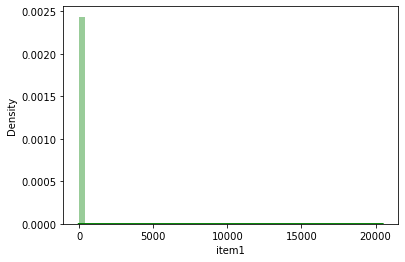

In [117]:
sn.distplot(df['item1'],color="g")

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item1'>

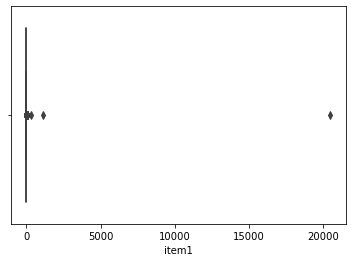

In [118]:
sn.boxplot(df['item1'])

In [119]:
df['item1'].describe()
# for item one most values are stored as negative values and max is 20478
#we can consider any values greater than 75% - 0.841050 as outliers to the rhs
# need to check the condition to find outliers

count    99983.000000
mean        -3.022455
std         65.156337
min        -24.875700
25%         -7.488100
50%         -3.273000
75%          0.841050
max      20478.690000
Name: item1, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item2', ylabel='Density'>

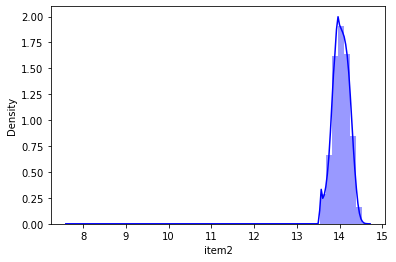

In [120]:
sn.distplot(df['item2'],color="b")
#seems its not a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item2'>

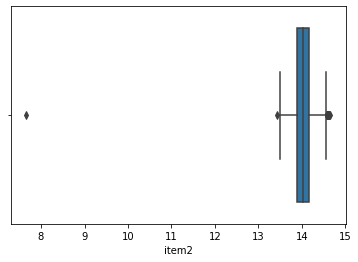

In [121]:
sn.boxplot(df['item2'])

In [122]:
df['item2'].describe()
#need to check the condition for outliers

count    99983.000000
mean        14.023863
std          0.191040
min          7.651800
25%         13.894500
50%         14.025100
75%         14.163500
max         14.654500
Name: item2, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item3', ylabel='Density'>

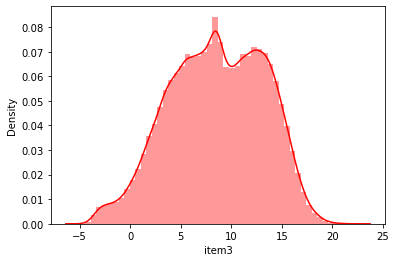

In [123]:
sn.distplot(df['item3'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item3'>

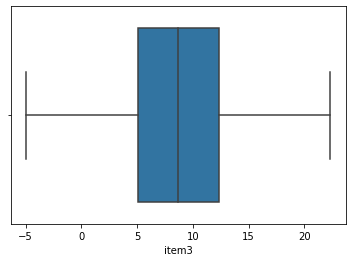

In [124]:
sn.boxplot(df['item3'])
#seems outliers are minimal

In [125]:
df['item3'].describe()

count    99983.000000
mean         8.563119
std          4.639113
min         -4.966100
25%          5.124500
50%          8.630400
75%         12.311000
max         22.331500
Name: item3, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item4', ylabel='Density'>

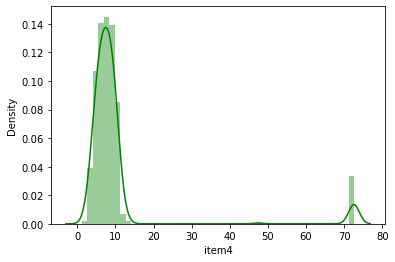

In [126]:
sn.distplot(df['item4'],color="g")
#not a normal distribution curve


C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item4'>

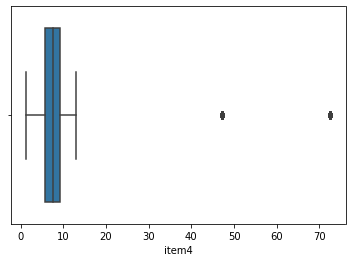

In [127]:
sn.boxplot(df['item4'])
#Outliers are there


In [128]:
df['item4'].describe()

count    99983.000000
mean        10.529624
std         14.158642
min          1.216700
25%          5.797050
50%          7.527700
75%          9.270400
max         72.546800
Name: item4, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item5', ylabel='Density'>

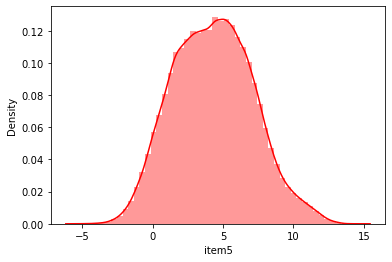

In [129]:
sn.distplot(df['item5'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item5'>

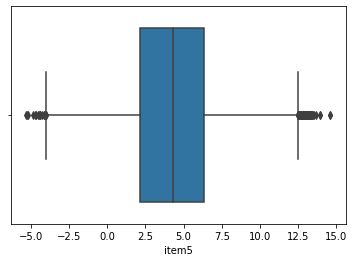

In [130]:
sn.boxplot(df['item5'])
#Outliers are there

In [131]:
df['item5'].describe()

count    99983.000000
mean         4.301424
std          2.848053
min         -5.322500
25%          2.173150
50%          4.281600
75%          6.300300
max         14.594500
Name: item5, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item6', ylabel='Density'>

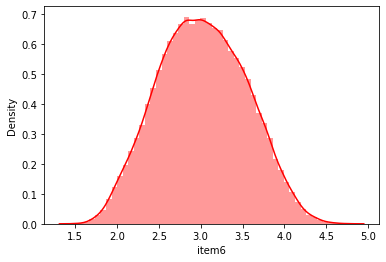

In [132]:
sn.distplot(df['item6'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item6'>

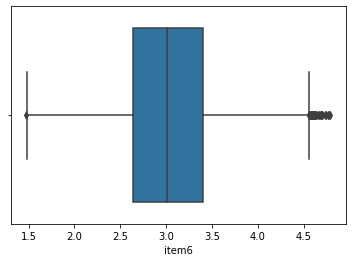

In [133]:
sn.boxplot(df['item6'])
#Outliers are there

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item7', ylabel='Density'>

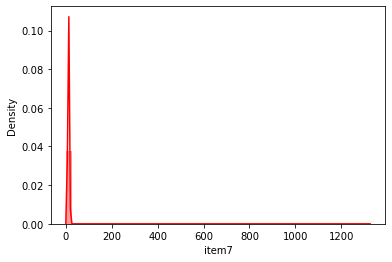

In [134]:
sn.distplot(df['item7'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item7'>

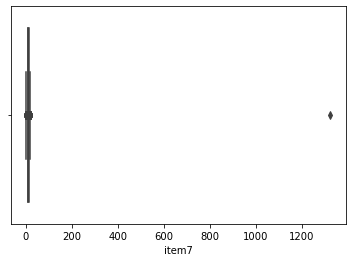

In [135]:
sn.boxplot(df['item7'])
#Outliers are there

In [136]:
df['item7'].describe()

count    99983.000000
mean        10.695923
std          5.147676
min          0.408400
25%          8.456250
50%         10.524400
75%         12.761500
max       1324.665000
Name: item7, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item8', ylabel='Density'>

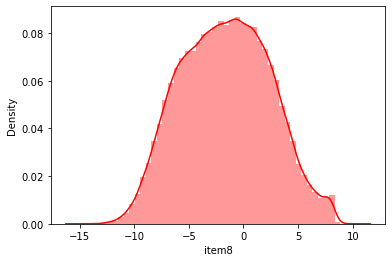

In [137]:
sn.distplot(df['item8'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item8'>

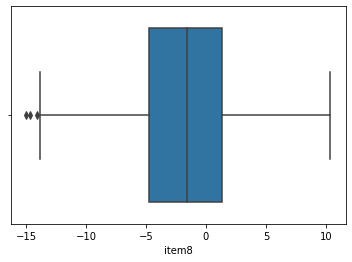

In [138]:
sn.boxplot(df['item8'])
#Outliers are there

In [139]:
df['item8'].describe()

count    99983.000000
mean        -1.619006
std          4.050587
min        -15.043400
25%         -4.730500
50%         -1.603000
75%          1.373150
max         10.376800
Name: item8, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item10', ylabel='Density'>

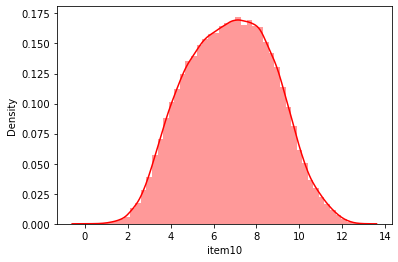

In [140]:
sn.distplot(df['item10'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item10'>

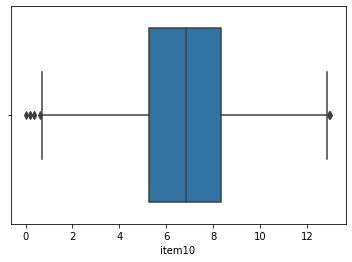

In [141]:
sn.boxplot(df['item10'])
#Outliers are there

In [142]:
df['item10'].describe()

count    99983.000000
mean         6.792035
std          2.040729
min          0.016200
25%          5.249700
50%          6.820000
75%          8.314750
max         12.991800
Name: item10, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item11', ylabel='Density'>

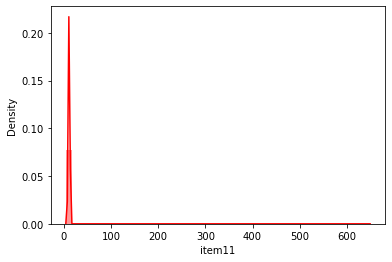

In [143]:
sn.distplot(df['item11'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item11'>

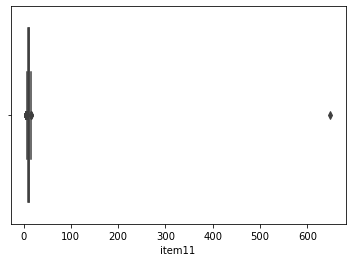

In [144]:
sn.boxplot(df['item11'])
#Outliers are there

In [145]:
df['item11'].describe()

count    99983.000000
mean        11.079825
std          2.588064
min          5.074800
25%          9.879500
50%         11.100800
75%         12.255600
max        648.220000
Name: item11, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item12', ylabel='Density'>

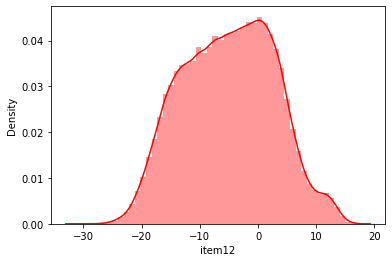

In [146]:
sn.distplot(df['item12'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item12'>

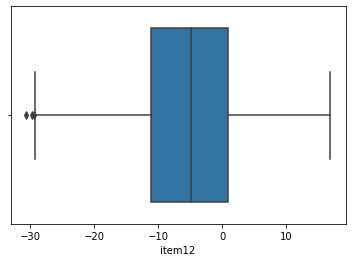

In [147]:
sn.boxplot(df['item12'])
#Outliers are there

In [148]:
df['item12'].describe()

count    99983.000000
mean        -5.041747
std          7.864862
min        -30.681600
25%        -11.178800
50%         -4.819700
75%          0.959100
max         16.900200
Name: item12, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item13', ylabel='Density'>

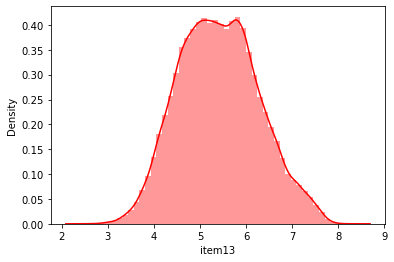

In [149]:
sn.distplot(df['item13'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item13'>

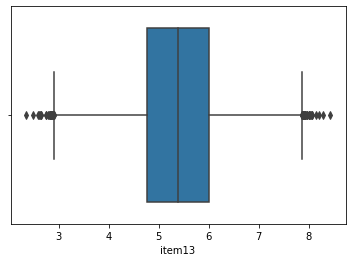

In [150]:
sn.boxplot(df['item13'])
#Outliers are there

In [151]:
df['item13'].describe()

count    99983.000000
mean         5.410750
std          0.868699
min          2.347300
25%          4.765700
50%          5.384800
75%          6.006950
max          8.433000
Name: item13, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item14', ylabel='Density'>

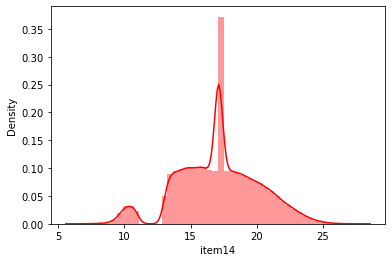

In [152]:
sn.distplot(df['item14'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item14'>

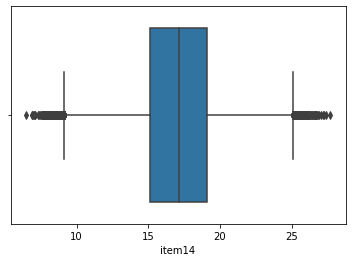

In [153]:
sn.boxplot(df['item14'])
#Outliers are there

In [154]:
df['item14'].describe()

count    99983.000000
mean        17.129124
std          3.014579
min          6.465300
25%         15.124900
50%         17.129124
75%         19.108800
max         27.691800
Name: item14, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item15', ylabel='Density'>

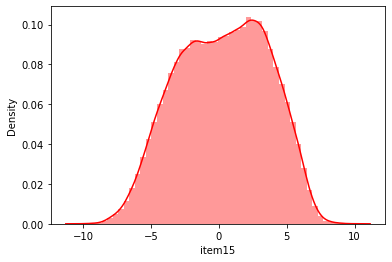

In [155]:
sn.distplot(df['item15'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item15'>

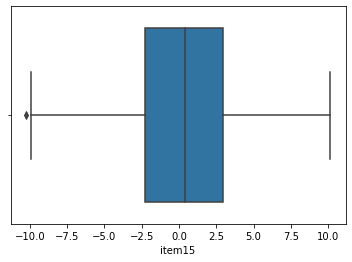

In [156]:
sn.boxplot(df['item15'])
#Outliers are there

In [157]:
df['item15'].describe()

count    99983.000000
mean         0.282900
std          3.333163
min        -10.265300
25%         -2.314950
50%          0.410300
75%          2.935300
max         10.137700
Name: item15, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item16', ylabel='Density'>

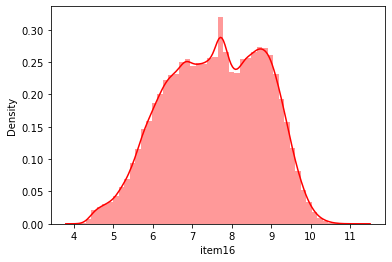

In [158]:
sn.distplot(df['item16'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item16'>

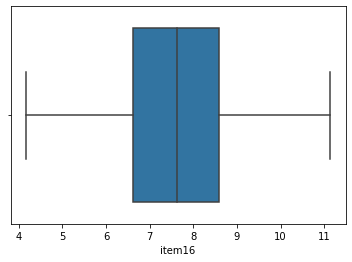

In [159]:
sn.boxplot(df['item16'])
#Outliers are there

In [160]:
df['item16'].describe()

count    99983.000000
mean         7.566770
std          1.231392
min          4.162400
25%          6.623500
50%          7.625100
75%          8.581050
max         11.136500
Name: item16, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item17', ylabel='Density'>

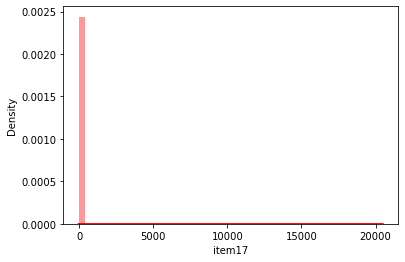

In [161]:
sn.distplot(df['item17'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item17'>

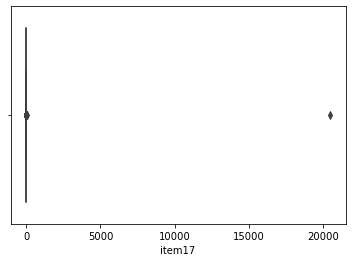

In [162]:
sn.boxplot(df['item17'])
#Outliers are there

In [163]:
df['item17'].describe()

count    99983.000000
mean         0.607073
std         64.997494
min        -20.731300
25%         -3.592150
50%          0.495700
75%          4.410950
max      20478.690000
Name: item17, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item18', ylabel='Density'>

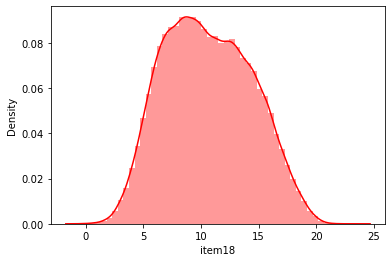

In [164]:
sn.distplot(df['item18'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item18'>

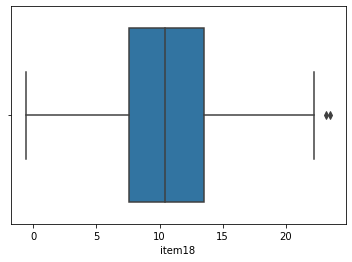

In [165]:
sn.boxplot(df['item18'])
#Outliers are there

In [166]:
df['item18'].describe()

count    99983.000000
mean        10.591176
std          3.781887
min         -0.593000
25%          7.602000
50%         10.390800
75%         13.479450
max         23.525900
Name: item18, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item19', ylabel='Density'>

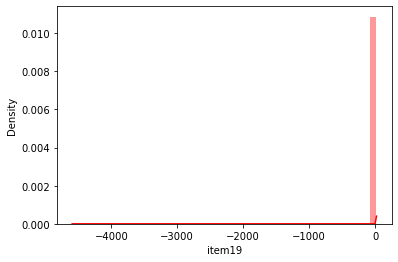

In [167]:
sn.distplot(df['item19'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item19'>

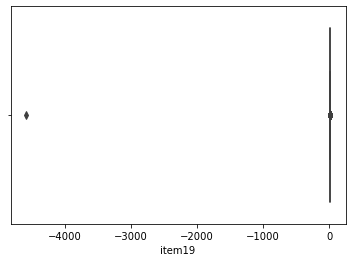

In [168]:
sn.boxplot(df['item19'])
#Outliers are there

In [169]:
df['item19'].describe()

count    99983.000000
mean        13.621246
std         14.559653
min      -4589.220000
25%         13.455500
50%         13.663000
75%         13.863100
max         14.654600
Name: item19, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item20', ylabel='Density'>

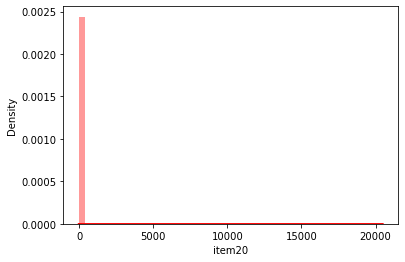

In [170]:
sn.distplot(df['item20'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item20'>

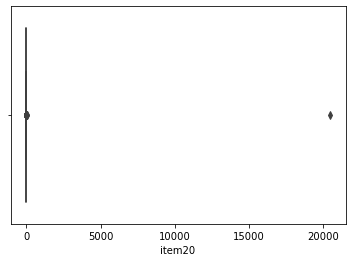

In [171]:
sn.boxplot(df['item20'])
#Outliers are there

In [172]:
df['item20'].describe()

count    99983.000000
mean        -3.849903
std         65.048734
min        -24.243100
25%         -8.320000
50%         -4.201400
75%         -0.089250
max      20478.690000
Name: item20, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item21', ylabel='Density'>

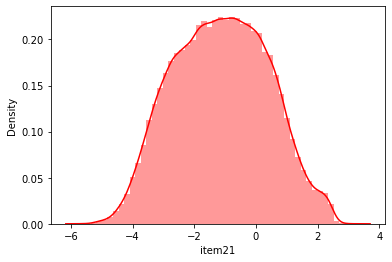

In [173]:
sn.distplot(df['item21'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item21'>

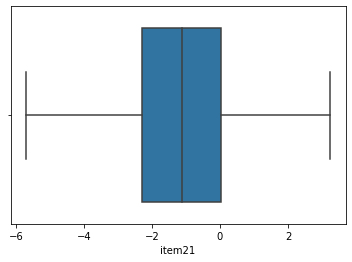

In [174]:
sn.boxplot(df['item21'])
#Outliers are there

In [175]:
df['item21'].describe()

count    99983.000000
mean        -1.131741
std          1.521922
min         -5.709700
25%         -2.302300
50%         -1.124100
75%          0.018300
max          3.243100
Name: item21, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item23', ylabel='Density'>

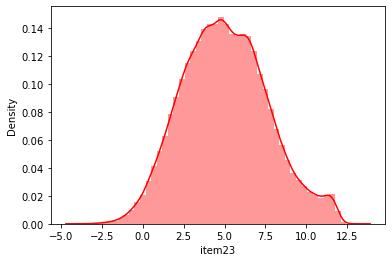

In [176]:
sn.distplot(df['item23'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item23'>

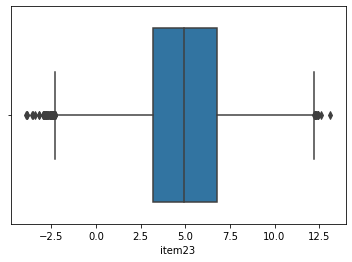

In [177]:
sn.boxplot(df['item23'])
#Outliers are there

In [178]:
df['item23'].describe()

count    99983.000000
mean         5.050015
std          2.614317
min         -3.929200
25%          3.167500
50%          4.949100
75%          6.795500
max         13.125700
Name: item23, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item24', ylabel='Density'>

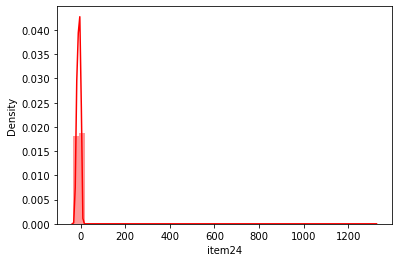

In [179]:
sn.distplot(df['item24'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item24'>

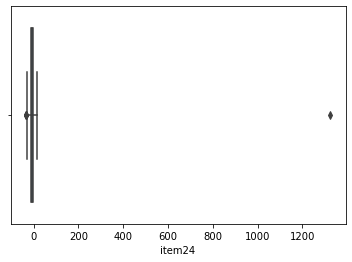

In [180]:
sn.boxplot(df['item24'])
#Outliers are there

In [181]:
df['item24'].describe()

count    99983.000000
mean        -7.671455
std          9.014472
min        -34.798400
25%        -13.770500
50%         -7.405600
75%         -1.449550
max       1324.665000
Name: item24, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item25', ylabel='Density'>

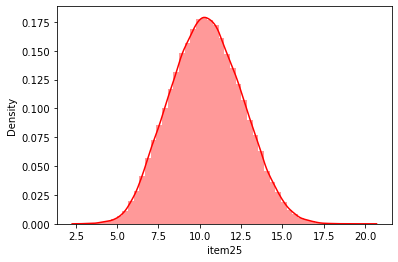

In [182]:
sn.distplot(df['item25'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item25'>

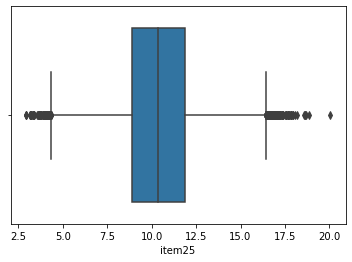

In [183]:
sn.boxplot(df['item25'])
#Outliers are there

In [184]:
df['item25'].describe()

count    99983.000000
mean        10.396038
std          2.159331
min          2.930300
25%          8.871700
50%         10.368300
75%         11.892600
max         20.047100
Name: item25, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item26', ylabel='Density'>

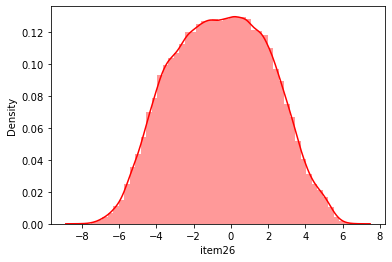

In [185]:
sn.distplot(df['item26'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item26'>

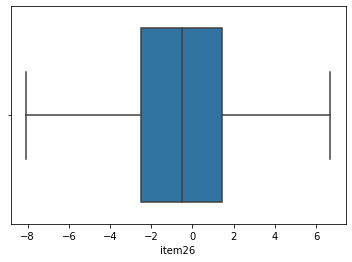

In [186]:
sn.boxplot(df['item26'])
#Outliers are there

In [187]:
df['item26'].describe()

count    99983.000000
mean        -0.524406
std          2.584817
min         -8.084300
25%         -2.511750
50%         -0.501300
75%          1.458400
max          6.696400
Name: item26, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item27', ylabel='Density'>

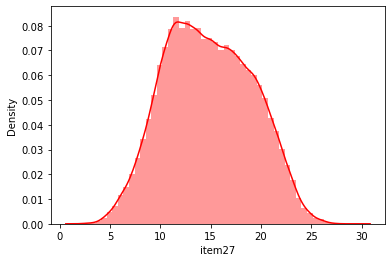

In [188]:
sn.distplot(df['item27'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item27'>

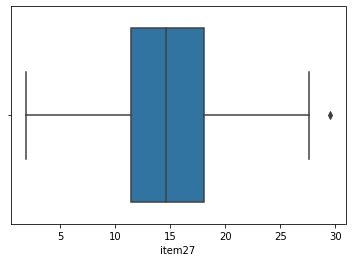

In [189]:
sn.boxplot(df['item27'])
#Outliers are there

In [190]:
df['item27'].describe()

count    99983.000000
mean        14.778699
std          4.328581
min          1.905500
25%         11.443200
50%         14.586000
75%         18.098800
max         29.546600
Name: item27, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item28', ylabel='Density'>

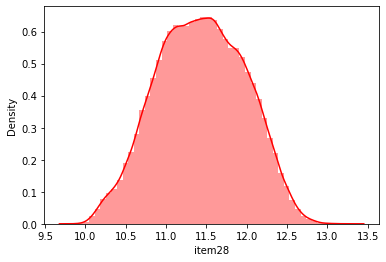

In [191]:
sn.distplot(df['item28'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item28'>

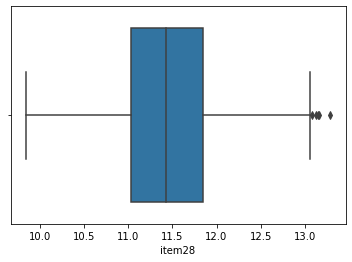

In [192]:
sn.boxplot(df['item28'])
#Outliers are there

In [193]:
df['item28'].describe()

count    99983.000000
mean        11.432705
std          0.542267
min          9.842500
25%         11.030550
50%         11.432600
75%         11.843100
max         13.287800
Name: item28, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item29', ylabel='Density'>

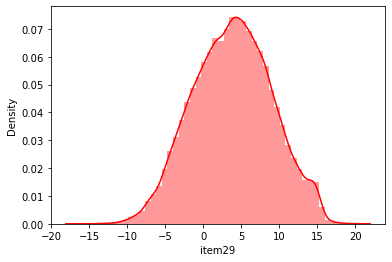

In [194]:
sn.distplot(df['item29'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item29'>

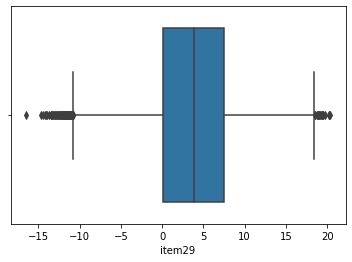

In [195]:
sn.boxplot(df['item29'])
#Outliers are there

In [196]:
df['item29'].describe()

count    99983.000000
mean         3.845688
std          5.164244
min        -16.513600
25%          0.159200
50%          3.915300
75%          7.486750
max         20.382300
Name: item29, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item30', ylabel='Density'>

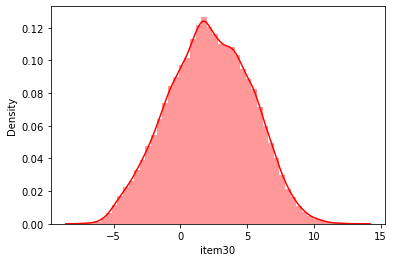

In [197]:
sn.distplot(df['item30'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item30'>

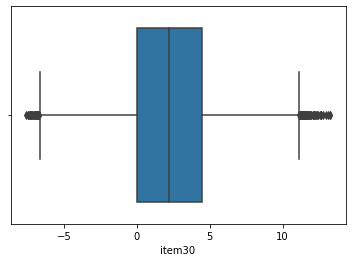

In [198]:
sn.boxplot(df['item30'])
#Outliers are there

In [199]:
df['item30'].describe()

count    99983.000000
mean         2.184246
std          3.119675
min         -7.637900
25%         -0.009400
50%          2.183600
75%          4.453300
max         13.283800
Name: item30, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item31', ylabel='Density'>

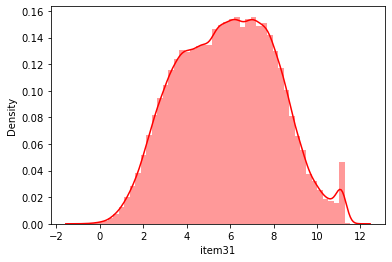

In [200]:
sn.distplot(df['item31'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item31'>

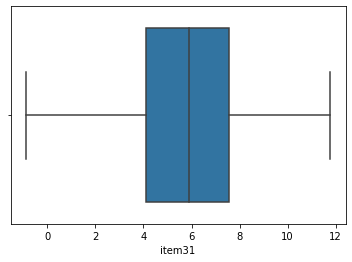

In [201]:
sn.boxplot(df['item31'])
#Outliers are there

In [202]:
df['item31'].describe()

count    99983.000000
mean         5.871142
std          2.246318
min         -0.887800
25%          4.122800
50%          5.912500
75%          7.548000
max         11.772600
Name: item31, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item32', ylabel='Density'>

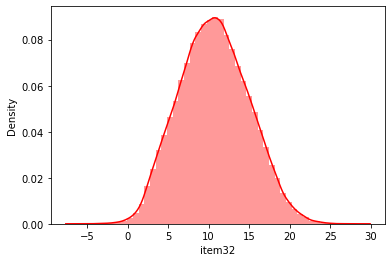

In [203]:
sn.distplot(df['item32'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item32'>

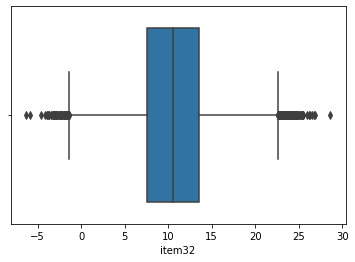

In [204]:
sn.boxplot(df['item32'])
#Outliers are there

In [205]:
df['item32'].describe()

count    99983.000000
mean        10.640319
std          4.270520
min         -6.337100
25%          7.605450
50%         10.570500
75%         13.598550
max         28.632900
Name: item32, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item33', ylabel='Density'>

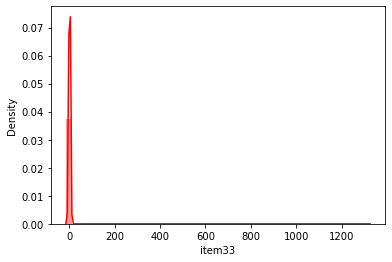

In [206]:
sn.distplot(df['item33'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item33'>

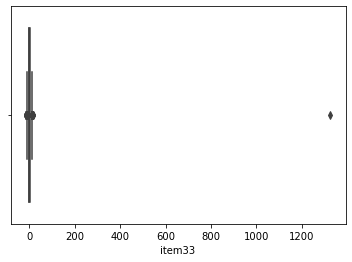

In [207]:
sn.boxplot(df['item33'])
#Outliers are there

In [208]:
df['item33'].describe()

count    99983.000000
mean         0.664088
std          5.839886
min        -14.545700
25%         -2.217650
50%          0.656100
75%          3.622100
max       1324.665000
Name: item33, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item34', ylabel='Density'>

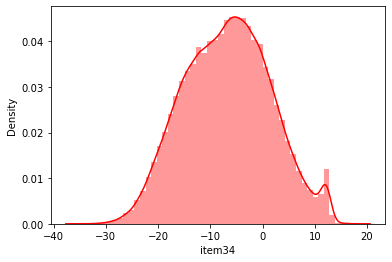

In [209]:
sn.distplot(df['item34'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item34'>

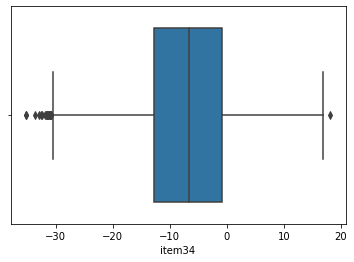

In [210]:
sn.boxplot(df['item34'])
#Outliers are there

In [211]:
df['item34'].describe()

count    99983.000000
mean        -6.702643
std          8.254891
min        -35.211700
25%        -12.785000
50%         -6.587700
75%         -0.869200
max         18.105600
Name: item34, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item35', ylabel='Density'>

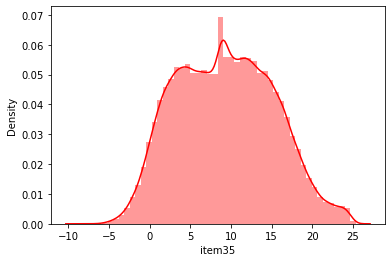

In [212]:
sn.distplot(df['item35'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item35'>

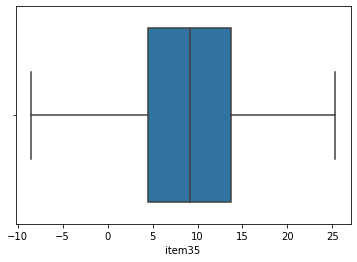

In [213]:
sn.boxplot(df['item35'])
#Outliers are there

In [214]:
df['item35'].describe()

count    99983.000000
mean         9.283646
std          5.930995
min         -8.535900
25%          4.517800
50%          9.153300
75%         13.729600
max         25.323100
Name: item35, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item36', ylabel='Density'>

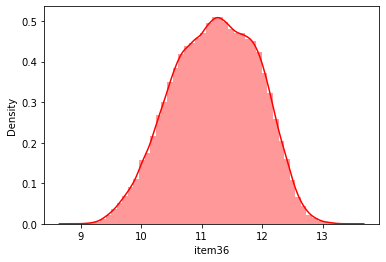

In [215]:
sn.distplot(df['item36'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item36'>

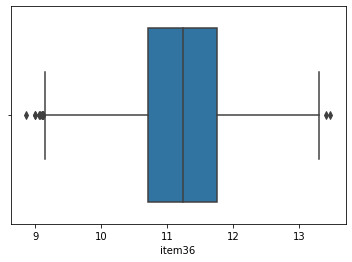

In [216]:
sn.boxplot(df['item36'])
#Outliers are there

In [217]:
df['item36'].describe()

count    99983.000000
mean        11.222825
std          0.696024
min          8.859000
25%         10.711300
50%         11.244500
75%         11.759400
max         13.469600
Name: item36, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item37', ylabel='Density'>

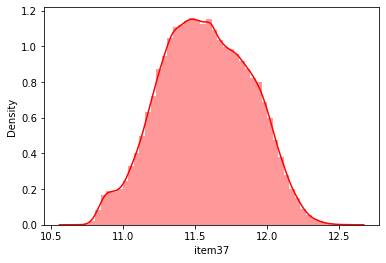

In [218]:
sn.distplot(df['item37'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item37'>

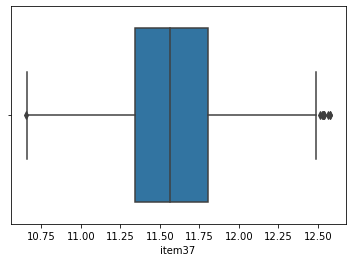

In [219]:
sn.boxplot(df['item37'])
#Outliers are there

In [220]:
df['item37'].describe()

count    99983.000000
mean        11.570024
std          0.309478
min         10.652800
25%         11.344200
50%         11.564300
75%         11.804300
max         12.577900
Name: item37, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item38', ylabel='Density'>

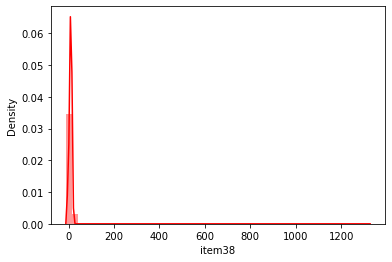

In [221]:
sn.distplot(df['item38'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item38'>

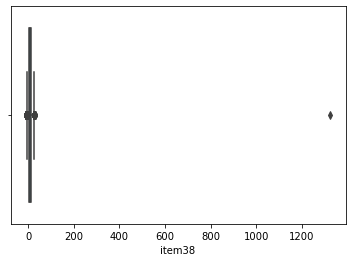

In [222]:
sn.boxplot(df['item38'])
#Outliers are there

In [223]:
df['item38'].describe()

count    99983.000000
mean         8.965176
std          7.216871
min         -9.939600
25%          5.318800
50%          9.432200
75%         13.085150
max       1324.665000
Name: item38, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item39', ylabel='Density'>

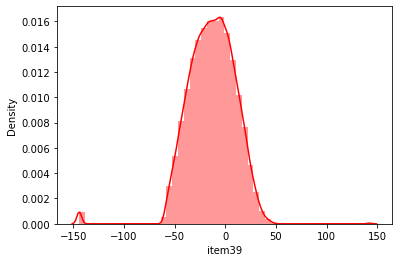

In [224]:
sn.distplot(df['item39'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item39'>

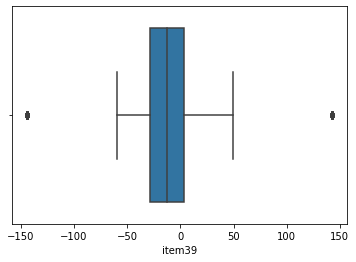

In [225]:
sn.boxplot(df['item39'])
#Outliers are there

In [226]:
df['item39'].describe()

count    99983.000000
mean       -13.117833
std         23.312343
min       -144.032400
25%        -28.673050
50%        -12.504600
75%          3.151200
max        142.247800
Name: item39, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item40', ylabel='Density'>

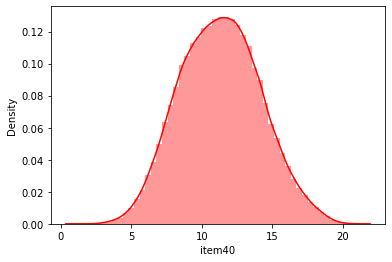

In [227]:
sn.distplot(df['item40'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item40'>

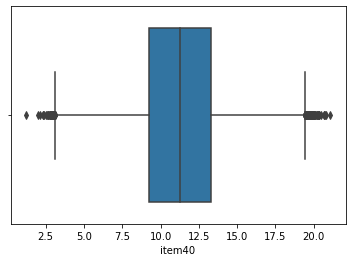

In [228]:
sn.boxplot(df['item40'])
#Outliers are there

In [229]:
df['item40'].describe()

count    99983.000000
mean        11.312059
std          2.860492
min          1.206200
25%          9.234600
50%         11.287400
75%         13.303900
max         21.080700
Name: item40, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item41', ylabel='Density'>

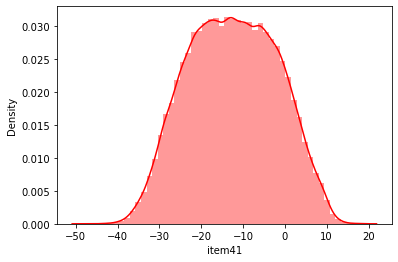

In [230]:
sn.distplot(df['item41'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item41'>

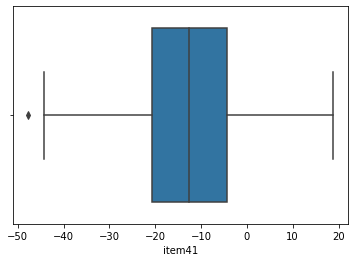

In [231]:
sn.boxplot(df['item41'])
#Outliers are there

In [232]:
df['item41'].describe()

count    99983.000000
mean       -12.486147
std         10.588099
min        -47.686200
25%        -20.684850
50%        -12.535600
75%         -4.262650
max         18.731800
Name: item41, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item42', ylabel='Density'>

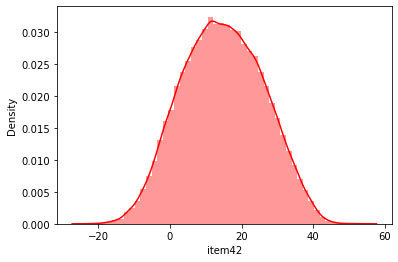

In [233]:
sn.distplot(df['item42'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item42'>

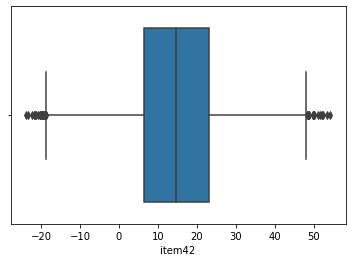

In [234]:
sn.boxplot(df['item42'])
#Outliers are there

In [235]:
df['item42'].describe()

count    99983.000000
mean        14.716487
std         11.383430
min        -23.902200
25%          6.362900
50%         14.590100
75%         23.073700
max         54.273800
Name: item42, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item43', ylabel='Density'>

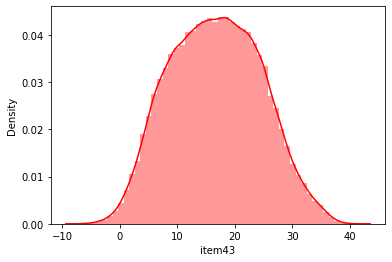

In [236]:
sn.distplot(df['item43'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item43'>

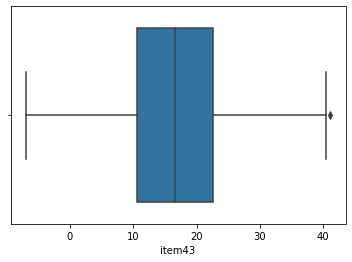

In [237]:
sn.boxplot(df['item43'])
#Outliers are there

In [238]:
df['item43'].describe()

count    99983.000000
mean        16.693645
std          7.868078
min         -6.977700
25%         10.652450
50%         16.661800
75%         22.564700
max         41.153000
Name: item43, dtype: float64

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='item44', ylabel='Density'>

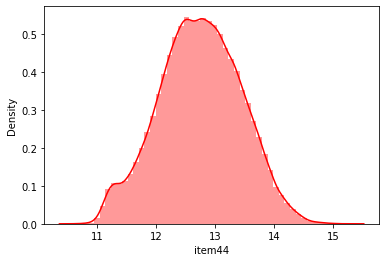

In [239]:
sn.distplot(df['item44'],color="r")
#seems close to a normal distribution curve

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item44'>

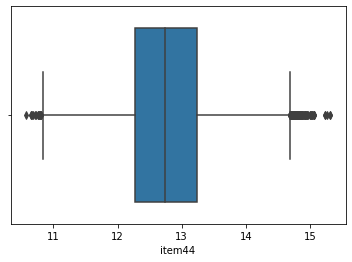

In [240]:
sn.boxplot(df['item44'])
#Outliers are there

In [241]:
df['item44'].describe()

count    99983.000000
mean        12.743005
std          0.691579
min         10.571600
25%         12.270300
50%         12.747200
75%         13.235100
max         15.317200
Name: item44, dtype: float64

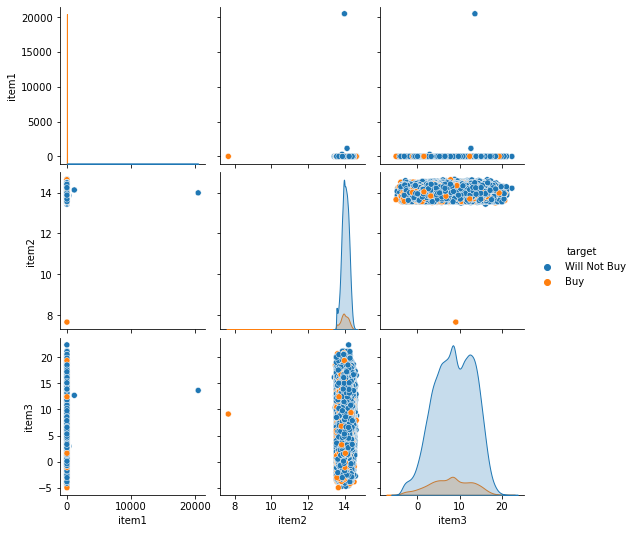

In [242]:
sn.pairplot(df[['item1','item2','item3','target']],hue='target')


In [243]:
#due to large number of outliers data is hard to make sence of

In [244]:
#handling outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

item1      8.32915
item2      0.26900
item3      7.18650
item4      3.47335
item5      4.12715
item6      0.76945
item7      4.30525
item8      6.10365
item10     3.06505
item11     2.37610
item12    12.13790
item13     1.24125
item14     3.98390
item15     5.25025
item16     1.95755
item17     8.00310
item18     5.87745
item19     0.40760
item20     8.23075
item21     2.32060
item23     3.62800
item24    12.32095
item25     3.02090
item26     3.97015
item27     6.65560
item28     0.81255
item29     7.32755
item30     4.46270
item31     3.42520
item32     5.99310
item33     5.83975
item34    11.91580
item35     9.21180
item36     1.04810
item37     0.46010
item38     7.76635
item39    31.82425
item40     4.06930
item41    16.42220
item42    16.71080
item43    11.91225
item44     0.96480
dtype: float64


In [245]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\krish\AppData\Local\Temp\ipykernel_17364\923123659.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [246]:
df.count()

item1     91497
item2     91497
item3     91497
item4     91497
item5     91497
item6     91497
item7     91497
item8     91497
item9     91497
item10    91497
item11    91497
item12    91497
item13    91497
item14    91497
item15    91497
item16    91497
item17    91497
item18    91497
item19    91497
item20    91497
item21    91497
item22    91497
item23    91497
item24    91497
item25    91497
item26    91497
item27    91497
item28    91497
item29    91497
item30    91497
item31    91497
item32    91497
item33    91497
item34    91497
item35    91497
item36    91497
item37    91497
item38    91497
item39    91497
item40    91497
item41    91497
item42    91497
item43    91497
item44    91497
target    91497
dtype: int64

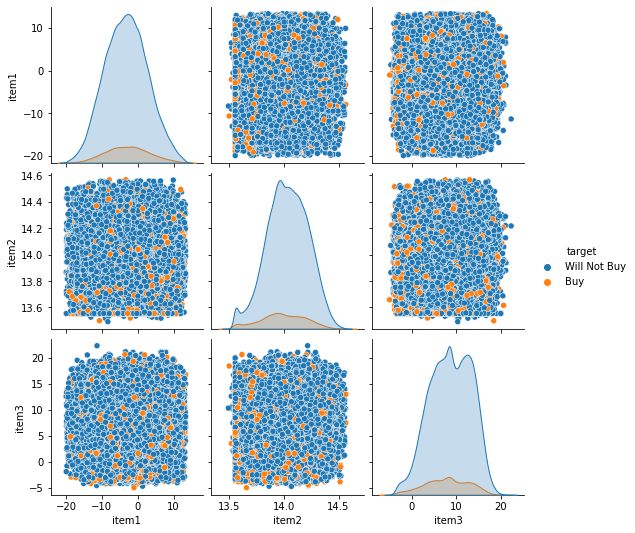

In [247]:

sn.pairplot(df[['item1','item2','item3','target']],hue='target')

<AxesSubplot:xlabel='item1', ylabel='item8'>

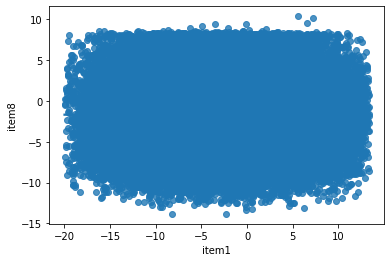

In [248]:
sn.regplot(x='item1',y='item8',data=df)

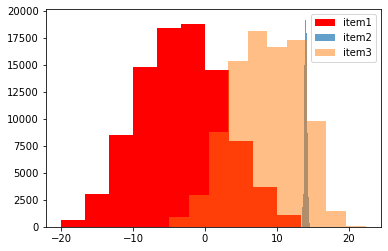

In [249]:
plt.hist(df['item1'],alpha=1,color='red', label=df.columns.values[0])
plt.hist(df['item2'], alpha=0.7, label=df.columns.values[1])
plt.hist(df['item3'], alpha=0.5, label=df.columns.values[2])
plt.legend()

Text(0.5, 1.0, 'Data Scatter Plot item5 vs item8')

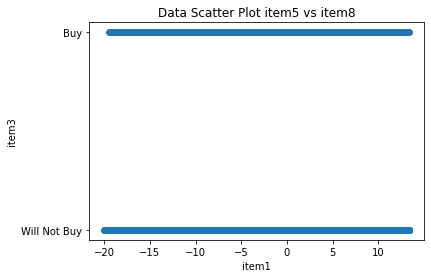

In [250]:
plt.scatter(df['item1'],df['target'])
plt.xlabel('item1')
plt.ylabel('item3')

plt.title('Data Scatter Plot item5 vs item8')

Text(0.5, 1.0, 'Data Scatter Plot item5 vs item8')

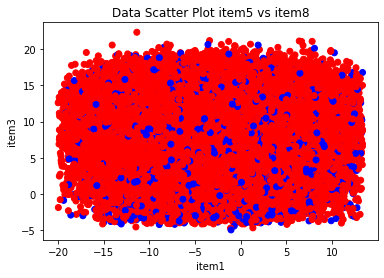

In [251]:
colors = {'Will Not Buy':'red', 'Buy':'blue'}
plt.scatter(df['item1'],df['item3'],c=df['target'].map(colors))
plt.xlabel('item1')
plt.ylabel('item3')

plt.title('Data Scatter Plot item5 vs item8')

<function matplotlib.pyplot.show(close=None, block=None)>

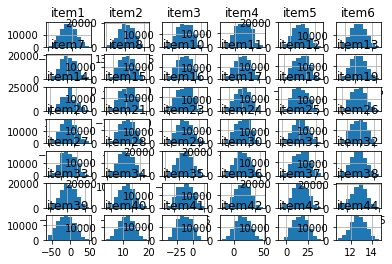

In [252]:
df.hist()
plt.show

Text(0.5, 1.0, 'Data Scatter Plot item1 vs item2')

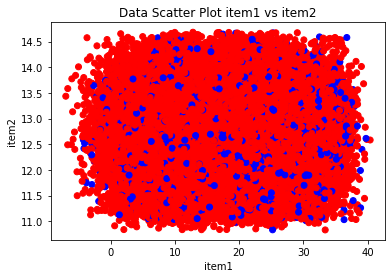

In [253]:
colors = {'Will Not Buy':'red', 'Buy':'blue'}
plt.scatter(df['item43'],df['item44'],c=df['target'].map(colors))
plt.xlabel('item1')
plt.ylabel('item2')

plt.title('Data Scatter Plot item1 vs item2')


Text(0.5, 1.0, 'Data Scatter Plot item1 vs item2')

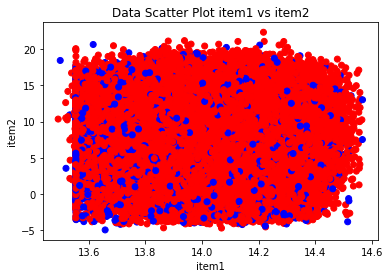

In [254]:
colors = {'Will Not Buy':'red', 'Buy':'blue'}
plt.scatter(df['item2'],df['item3'],c=df['target'].map(colors))
plt.xlabel('item1')
plt.ylabel('item2')

plt.title('Data Scatter Plot item1 vs item2')

Text(0.5, 1.0, 'Data Scatter Plot item9 vs item22')

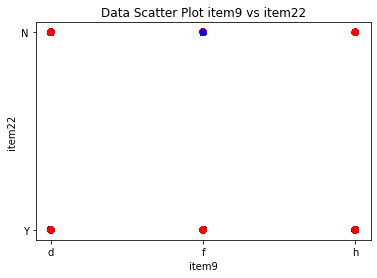

In [255]:
colors = {'Will Not Buy':'red', 'Buy':'blue'}
plt.scatter(df['item9'],df['item22'],c=df['target'].map(colors))
plt.xlabel('item9')
plt.ylabel('item22')

plt.title('Data Scatter Plot item9 vs item22')

In [256]:
#as the item 9 and item 22 are catagorical we will be encoding the values
#for item 22 (yes/no) as well as target (buy/will not buy) label encoding is enough
#for item 9 as there is no relation ship we can see we need to use one-hot encoding 

In [257]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['item22'] = labelencoder.fit_transform(df['item22'])


In [258]:
df[['item22']]

,item22
0,1
2,1
3,1
4,0
5,1
...,...
99996,0
99997,1
99998,1
99999,1


In [259]:
df['target'] = labelencoder.fit_transform(df['target'])

In [260]:
df[['target']]


,target
0,1
2,1
3,1
4,0
5,1
...,...
99996,1
99997,1
99998,1
99999,1


In [261]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough' )
#df2=ct.fit_transform(df)
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['item9'])
# Drop column B as it is now encoded
df = df.drop('item9',axis = 1)
# Join the encoded df
df = df.join(one_hot)


In [262]:
df

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item39,item40,item41,item42,item43,item44,target,d,f,h
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,4.5563,10.6019,...,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099,1,1,0,0
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.0480,11.2321,0.8326,7.4749,9.6369,...,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176,1,0,1,0
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,8.5139,13.9320,...,-39.1025,12.8864,-20.0529,19.2790,17.9902,12.8956,1,0,1,0
4,-0.1273,13.6008,7.5372,8.6179,5.0920,2.8564,12.0897,-4.7146,7.3956,12.2021,...,18.2998,14.4215,-0.6626,2.3012,20.8598,12.6211,0,1,0,0
5,-2.6554,13.9779,2.9449,7.8785,3.7367,2.5942,10.6317,6.5296,7.0860,12.2669,...,-13.4896,14.2844,0.7801,18.7002,14.7721,14.0377,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,-9.5348,13.9860,5.2982,8.2705,1.0914,3.2326,11.4880,-0.4956,3.5142,10.3404,...,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,1,1,0,0
99997,-11.8776,14.4131,3.3087,3.5800,0.8982,2.2532,4.9149,-2.4484,6.6345,8.3096,...,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,1,0,1,0
99998,-0.4651,13.8775,9.7414,10.9044,3.1008,2.1497,11.2232,-5.0518,5.6456,9.3410,...,-49.5007,7.4376,-21.2946,16.5701,15.9192,11.4688,1,0,1,0
99999,0.7086,14.2110,6.5641,7.6177,5.5803,3.7091,9.7148,-8.6098,5.7930,12.5173,...,-42.9704,12.7881,4.4044,27.0880,14.0471,13.4318,1,0,1,0


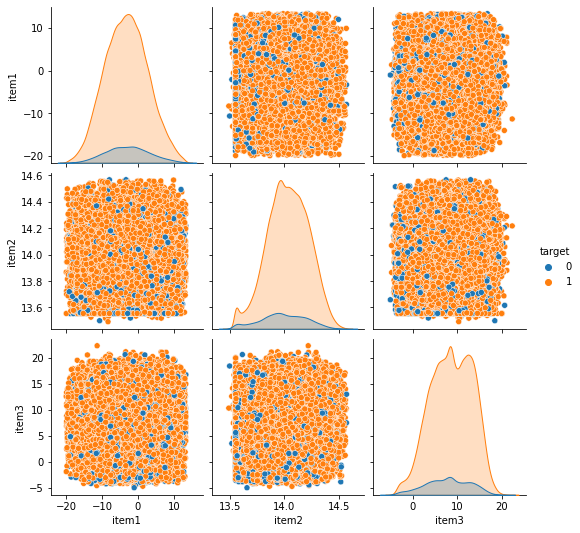

In [263]:
sn.pairplot(df[['item1','item2','item3','target']],hue='target')


Text(0.5, 1.0, 'Data Scatter Plot item1 vs item2')

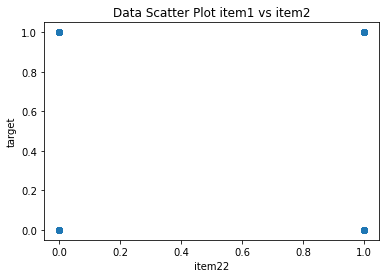

In [264]:
colors = {'Will Not Buy':'red', 'Buy':'blue'}
plt.scatter(df['item22'],df['target'])
plt.xlabel('item22')
plt.ylabel('target')

plt.title('Data Scatter Plot item1 vs item2')

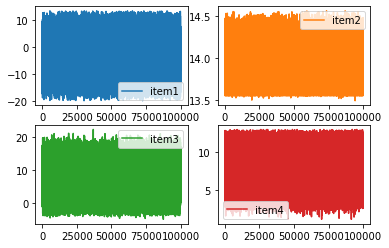

In [265]:
df[['item1','item2','item3','item4']].plot(kind='line',subplots = True, layout=(2,2), sharex = False, sharey = False)
plt.show()

In [266]:
df.corr()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item39,item40,item41,item42,item43,item44,target,d,f,h
item1,1.000000,-0.002627,0.000197,0.005059,0.001842,-0.003898,0.000712,0.005602,-0.000361,0.000750,...,-0.005643,-0.004401,-0.008433,0.006229,0.003002,-0.000047,-0.019842,-0.003391,0.006213,-0.005744
item2,-0.002627,1.000000,0.001799,0.007213,-0.002568,0.004075,-0.001369,0.000287,-0.004165,0.002698,...,-0.002330,-0.002028,0.002477,-0.010028,-0.004002,-0.004292,0.069887,0.001265,-0.000787,-0.000856
item3,0.000197,0.001799,1.000000,0.000450,-0.003459,0.006963,-0.005756,0.004210,-0.004703,0.000774,...,0.001348,0.006441,0.003367,-0.004960,-0.000640,0.003304,0.057354,0.003798,-0.003193,-0.000945
item4,0.005059,0.007213,0.000450,1.000000,-0.000821,-0.002753,0.000666,-0.000801,0.004983,-0.002012,...,-0.005545,0.001151,0.000689,0.001334,0.001536,-0.001752,0.002350,-0.000766,-0.000506,0.002444
item5,0.001842,-0.002568,-0.003459,-0.000821,1.000000,-0.000197,-0.001848,0.001815,-0.006475,0.000279,...,-0.000332,-0.004376,0.008867,0.007166,0.003890,-0.001839,-0.060517,-0.001055,-0.001035,0.004030
item6,-0.003898,0.004075,0.006963,-0.002753,-0.000197,1.000000,0.000360,0.003300,0.001444,0.003101,...,0.002107,-0.003891,-0.003784,-0.003462,-0.003507,-0.000859,0.025199,-0.004954,0.004826,-0.000063
item7,0.000712,-0.001369,-0.005756,0.000666,-0.001848,0.000360,1.000000,0.002919,0.003077,0.002453,...,-0.005183,-0.000497,0.003925,0.005386,-0.000593,-0.003525,-0.053316,-0.001594,0.004826,-0.006434
item8,0.005602,0.000287,0.004210,-0.000801,0.001815,0.003300,0.002919,1.000000,0.000867,0.000312,...,-0.003668,-0.003033,0.005800,0.000631,0.003269,0.000569,-0.053391,0.001340,-0.001246,-0.000099
item10,-0.000361,-0.004165,-0.004703,0.004983,-0.006475,0.001444,0.003077,0.000867,1.000000,-0.004484,...,-0.000044,-0.000518,0.000717,-0.002732,0.000451,-0.000727,-0.008237,-0.003328,0.001495,0.003383
item11,0.000750,0.002698,0.000774,-0.002012,0.000279,0.003101,0.002453,0.000312,-0.004484,1.000000,...,-0.007121,-0.007950,0.000043,-0.002264,0.000739,-0.004476,-0.006999,-0.004860,0.004334,0.000725


<AxesSubplot:>

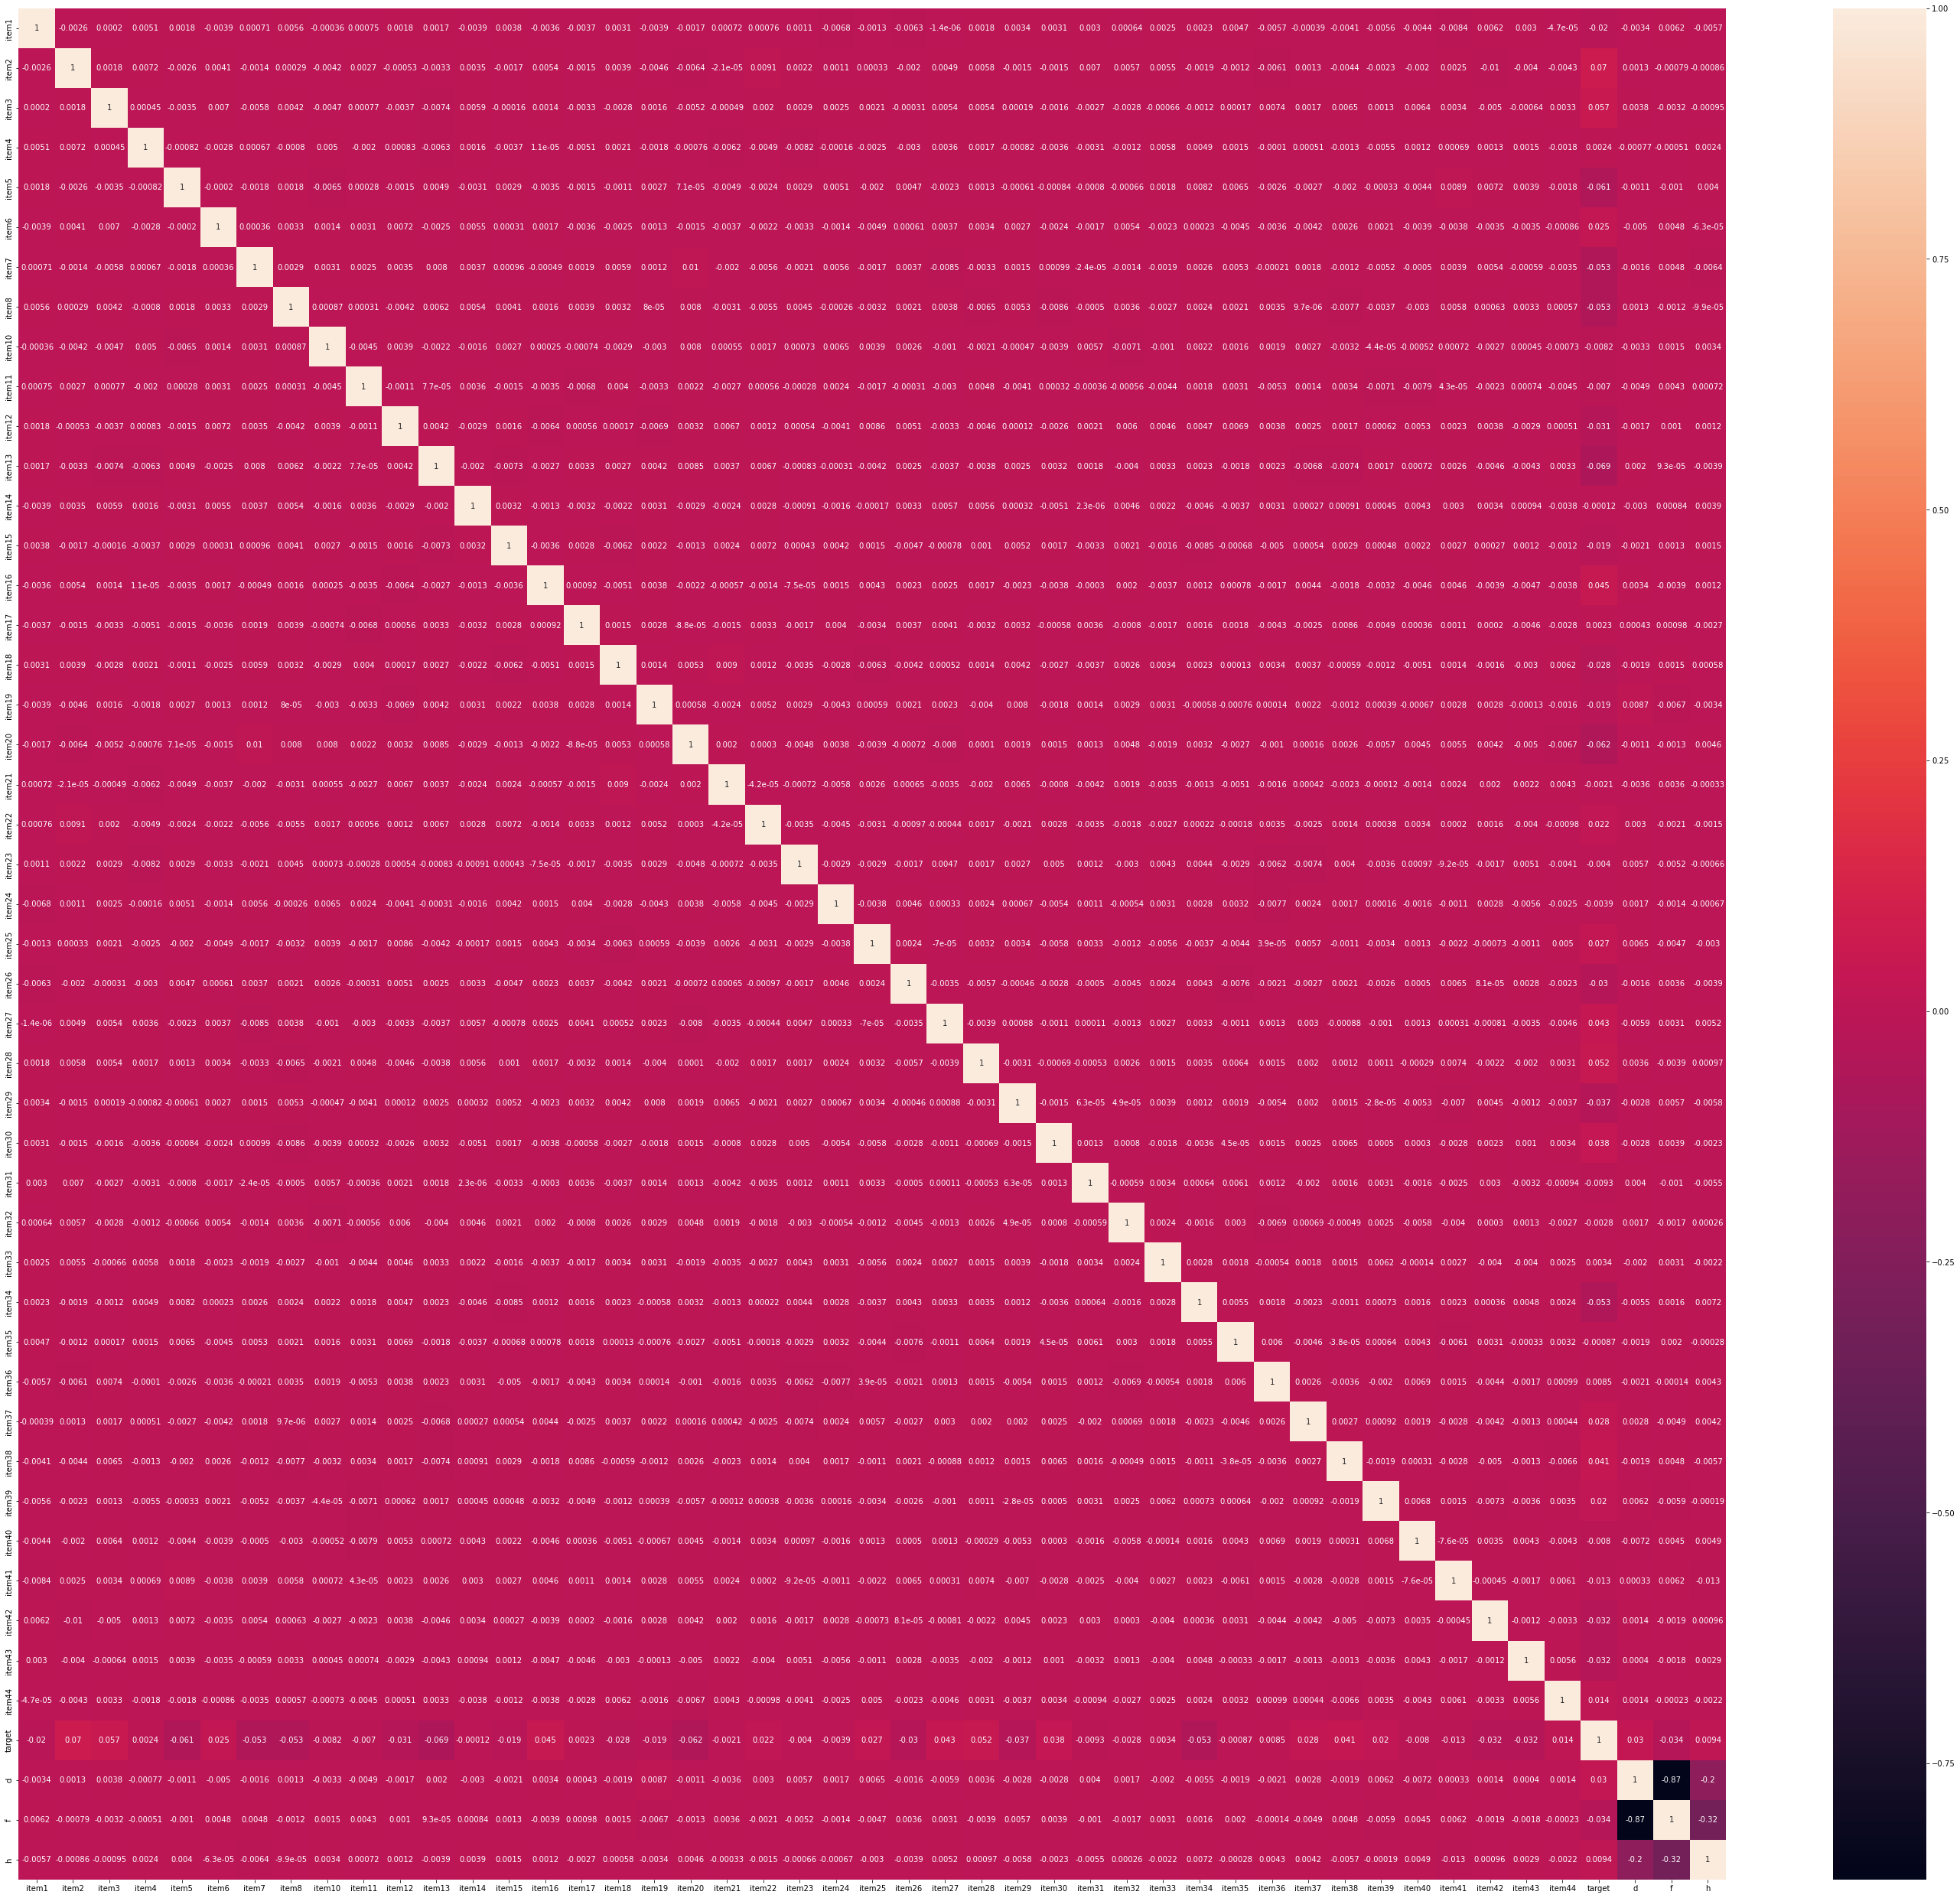

In [267]:
fig, ax = plt.subplots(figsize=(50,45))  
sn.heatmap(data = df.corr(),annot=True)


In [268]:
df.iloc[:,:4].corr(method='pearson')

,item1,item2,item3,item4
item1,1.000000,-0.002627,0.000197,0.005059
item2,-0.002627,1.000000,0.001799,0.007213
item3,0.000197,0.001799,1.000000,0.000450
item4,0.005059,0.007213,0.000450,1.000000


In [269]:
df_data = pd.concat([df.iloc[:,:43],df.iloc[:,44:]], axis=1)

In [270]:
df_data.corr()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item38,item39,item40,item41,item42,item43,item44,d,f,h
item1,1.000000,-0.002627,0.000197,0.005059,0.001842,-0.003898,0.000712,0.005602,-0.000361,0.000750,...,-0.004143,-0.005643,-0.004401,-0.008433,0.006229,0.003002,-0.000047,-0.003391,0.006213,-0.005744
item2,-0.002627,1.000000,0.001799,0.007213,-0.002568,0.004075,-0.001369,0.000287,-0.004165,0.002698,...,-0.004414,-0.002330,-0.002028,0.002477,-0.010028,-0.004002,-0.004292,0.001265,-0.000787,-0.000856
item3,0.000197,0.001799,1.000000,0.000450,-0.003459,0.006963,-0.005756,0.004210,-0.004703,0.000774,...,0.006550,0.001348,0.006441,0.003367,-0.004960,-0.000640,0.003304,0.003798,-0.003193,-0.000945
item4,0.005059,0.007213,0.000450,1.000000,-0.000821,-0.002753,0.000666,-0.000801,0.004983,-0.002012,...,-0.001290,-0.005545,0.001151,0.000689,0.001334,0.001536,-0.001752,-0.000766,-0.000506,0.002444
item5,0.001842,-0.002568,-0.003459,-0.000821,1.000000,-0.000197,-0.001848,0.001815,-0.006475,0.000279,...,-0.002033,-0.000332,-0.004376,0.008867,0.007166,0.003890,-0.001839,-0.001055,-0.001035,0.004030
item6,-0.003898,0.004075,0.006963,-0.002753,-0.000197,1.000000,0.000360,0.003300,0.001444,0.003101,...,0.002610,0.002107,-0.003891,-0.003784,-0.003462,-0.003507,-0.000859,-0.004954,0.004826,-0.000063
item7,0.000712,-0.001369,-0.005756,0.000666,-0.001848,0.000360,1.000000,0.002919,0.003077,0.002453,...,-0.001189,-0.005183,-0.000497,0.003925,0.005386,-0.000593,-0.003525,-0.001594,0.004826,-0.006434
item8,0.005602,0.000287,0.004210,-0.000801,0.001815,0.003300,0.002919,1.000000,0.000867,0.000312,...,-0.007723,-0.003668,-0.003033,0.005800,0.000631,0.003269,0.000569,0.001340,-0.001246,-0.000099
item10,-0.000361,-0.004165,-0.004703,0.004983,-0.006475,0.001444,0.003077,0.000867,1.000000,-0.004484,...,-0.003153,-0.000044,-0.000518,0.000717,-0.002732,0.000451,-0.000727,-0.003328,0.001495,0.003383
item11,0.000750,0.002698,0.000774,-0.002012,0.000279,0.003101,0.002453,0.000312,-0.004484,1.000000,...,0.003404,-0.007121,-0.007950,0.000043,-0.002264,0.000739,-0.004476,-0.004860,0.004334,0.000725


<AxesSubplot:>

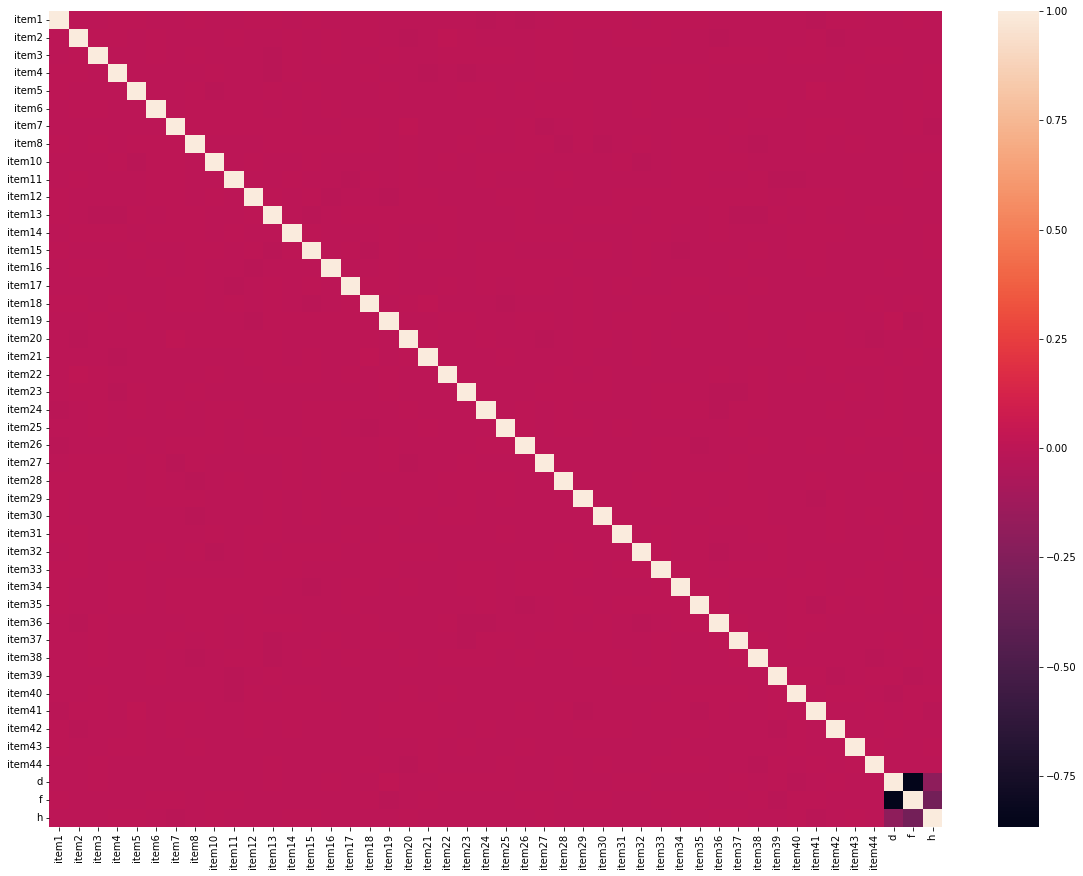

In [271]:
fig, ax = plt.subplots(figsize=(20,15))  
sn.heatmap(data = df_data.corr())


In [272]:
X = pd.concat([df.iloc[:,:43],df.iloc[:,44:]], axis=1)

In [273]:
X.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item38,item39,item40,item41,item42,item43,item44,d,f,h
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,4.5563,10.6019,...,11.7116,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099,1,0,0
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.0480,11.2321,0.8326,7.4749,9.6369,...,5.8048,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176,0,1,0
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,8.5139,13.9320,...,11.8147,-39.1025,12.8864,-20.0529,19.2790,17.9902,12.8956,0,1,0
4,-0.1273,13.6008,7.5372,8.6179,5.0920,2.8564,12.0897,-4.7146,7.3956,12.2021,...,4.3396,18.2998,14.4215,-0.6626,2.3012,20.8598,12.6211,1,0,0
5,-2.6554,13.9779,2.9449,7.8785,3.7367,2.5942,10.6317,6.5296,7.0860,12.2669,...,3.6632,-13.4896,14.2844,0.7801,18.7002,14.7721,14.0377,0,1,0


In [274]:
Y=df[['target']]

In [275]:
Y.head(200)

,target
0,1
2,1
3,1
4,0
5,1
...,...
211,1
212,1
213,1
214,1


In [276]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

X=scale.fit_transform(X)
print(X)

[[-1.34936797  0.71284095  0.95562439 ...  1.35524038 -1.17365742
  -0.27030466]
 [-1.05618645 -1.22773171  1.04740378 ... -0.73787648  0.85203738
  -0.27030466]
 [ 0.54810367  1.64652761  1.07280701 ... -0.73787648  0.85203738
  -0.27030466]
 ...
 [ 0.46985881 -0.77063074  0.25500861 ... -0.73787648  0.85203738
  -0.27030466]
 [ 0.6682944   0.98562701 -0.43016685 ... -0.73787648  0.85203738
  -0.27030466]
 [-0.92323105  1.18363388  1.40731875 ... -0.73787648  0.85203738
  -0.27030466]]


In [277]:
X.shape

(91497, 46)

In [278]:
np.concatenate((df.columns.values[:43],df.columns.values[44:]),axis=0)


array(['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7',
       'item8', 'item10', 'item11', 'item12', 'item13', 'item14',
       'item15', 'item16', 'item17', 'item18', 'item19', 'item20',
       'item21', 'item22', 'item23', 'item24', 'item25', 'item26',
       'item27', 'item28', 'item29', 'item30', 'item31', 'item32',
       'item33', 'item34', 'item35', 'item36', 'item37', 'item38',
       'item39', 'item40', 'item41', 'item42', 'item43', 'item44', 'd',
       'f', 'h'], dtype=object)

In [279]:
X_dataframe =pd.DataFrame(X,columns=np.concatenate((df.columns.values[:43],df.columns.values[44:]),axis=0))

In [280]:
X_dataframe

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item38,item39,item40,item41,item42,item43,item44,d,f,h
0,-1.349368,0.712841,0.955624,1.013913,0.141393,0.397555,1.796556,0.633902,-1.097677,-0.291592,...,0.466020,-0.536881,0.449490,1.210982,0.625740,-0.578228,-2.224153,1.355240,-1.173657,-0.270305
1,-1.056186,-1.227732,1.047404,1.592927,-0.377050,0.055529,0.180507,0.605937,0.332769,-0.886559,...,-0.556121,0.757216,0.765974,0.568983,-0.776795,0.466543,0.983641,-0.737876,0.852037,-0.270305
2,0.548104,1.646528,1.072807,0.314006,-0.251765,0.571709,-0.492039,1.092805,0.841997,1.761571,...,0.483861,-1.265006,0.554668,-0.714732,0.399674,0.163745,0.225173,-0.737876,0.852037,-0.270305
3,0.526970,-2.227772,-0.220321,0.607075,0.281262,-0.309147,0.463337,-0.763197,0.293903,0.695007,...,-0.809666,1.460296,1.094124,1.118608,-1.093631,0.528634,-0.173676,1.355240,-1.173657,-0.270305
4,0.099548,-0.241910,-1.210637,0.255982,-0.197315,-0.808197,-0.017501,2.012045,0.142164,0.734959,...,-0.926713,-0.048976,1.045946,1.255014,0.348765,-0.245459,1.884648,-0.737876,0.852037,-0.270305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91492,-1.063541,-0.199255,-0.703154,0.442117,-1.131410,0.406881,0.264900,0.278117,-1.608424,-0.452819,...,-0.823440,0.490365,-0.887221,-0.291132,-2.042926,0.697841,-0.478952,1.355240,-1.173657,-0.270305
91493,-1.459634,2.049914,-1.132184,-1.785098,-1.199631,-1.457229,-1.902859,-0.203864,-0.079122,-1.704902,...,-0.015633,-0.699941,1.155517,-0.695567,0.997646,0.977714,-0.072111,-0.737876,0.852037,-0.270305
91494,0.469859,-0.770631,0.255009,1.692785,-0.421860,-1.654222,0.177571,-0.846423,-0.563796,-1.068996,...,0.489831,-1.758684,-1.360120,-0.832134,0.161409,-0.099597,-1.847971,-0.737876,0.852037,-0.270305
91495,0.668294,0.985627,-0.430167,0.132144,0.453688,1.313812,-0.319888,-1.724593,-0.491553,0.889342,...,0.687742,-1.448643,0.520124,1.597689,1.086525,-0.337647,1.004273,-0.737876,0.852037,-0.270305


In [281]:
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X,Y)
X_RFE=rfe.transform(X)


In [282]:
print(X_RFE)

[[ 0.95562439  1.79655597  0.51199659 -0.44993786 -1.22016954]
 [ 1.04740378  0.18050651  1.62710729  1.14920735  1.10416328]
 [ 1.07280701 -0.49203944  0.09092002  0.16388797  1.25194789]
 ...
 [ 0.25500861  0.17757136  1.52206639  0.75645794  0.58092087]
 [-0.43016685 -0.31988773  0.11320296  1.19911409 -0.16648922]
 [ 1.40731875  0.06313334 -0.62920104  0.09756504  0.3632107 ]]


In [283]:
rfe_10 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe_10.fit(X,Y)
X_RFE_10=rfe_10.transform(X)


In [284]:
print(X_RFE_10)

[[ 0.95562439  0.14139319  1.79655597 ...  0.65444016 -0.72475372
   0.46601976]
 [ 1.04740378 -0.37705013  0.18050651 ...  0.61408046  0.81305166
  -0.55612055]
 [ 1.07280701 -0.25176496 -0.49203944 ... -0.64673273 -0.98130313
   0.48386067]
 ...
 [ 0.25500861 -0.42186042  0.17757136 ... -0.21296991 -0.2638667
   0.48983071]
 [-0.43016685  0.45368802 -0.31988773 ...  0.71155863 -0.61428097
   0.68774191]
 [ 1.40731875 -0.65586967  0.06313334 ... -0.51992097 -0.14585373
  -0.05508698]]


In [285]:
rfe_15 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
rfe_15.fit(X,Y)
X_RFE_15=rfe_15.transform(X)

In [286]:
print(X_RFE_15)

[[ 0.71284095  0.95562439  0.14139319 ... -0.72475372  0.46601976
   0.62573968]
 [-1.22773171  1.04740378 -0.37705013 ...  0.81305166 -0.55612055
  -0.7767947 ]
 [ 1.64652761  1.07280701 -0.25176496 ... -0.98130313  0.48386067
   0.39967426]
 ...
 [-0.77063074  0.25500861 -0.42186042 ... -0.2638667   0.48983071
   0.16140931]
 [ 0.98562701 -0.43016685  0.45368802 ... -0.61428097  0.68774191
   1.0865254 ]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.14585373 -0.05508698
  -0.2736228 ]]


In [287]:
rfe_20 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
rfe_20.fit(X,Y)
X_RFE_20=rfe_20.transform(X)

In [288]:
print(X_RFE_20)

[[ 0.71284095  0.95562439  0.14139319 ...  0.46601976  0.62573968
  -0.57822789]
 [-1.22773171  1.04740378 -0.37705013 ... -0.55612055 -0.7767947
   0.46654327]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.48386067  0.39967426
   0.16374478]
 ...
 [-0.77063074  0.25500861 -0.42186042 ...  0.48983071  0.16140931
  -0.09959697]
 [ 0.98562701 -0.43016685  0.45368802 ...  0.68774191  1.0865254
  -0.33764722]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.05508698 -0.2736228
  -0.41141088]]


In [289]:
rfe_21 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=21)
rfe_21.fit(X,Y)
X_RFE_21=rfe_21.transform(X)

In [290]:
print(X_RFE_21)

[[ 0.71284095  0.95562439  0.14139319 ...  0.46601976  1.21098245
   0.62573968]
 [-1.22773171  1.04740378 -0.37705013 ... -0.55612055  0.56898303
  -0.7767947 ]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.48386067 -0.71473216
   0.39967426]
 ...
 [-0.77063074  0.25500861 -0.42186042 ...  0.48983071 -0.83213407
   0.16140931]
 [ 0.98562701 -0.43016685  0.45368802 ...  0.68774191  1.59768922
   1.0865254 ]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.05508698 -1.27639302
  -0.2736228 ]]


In [291]:
rfe_22 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=22)
rfe_22.fit(X,Y)
X_RFE_22=rfe_22.transform(X)

In [292]:
print(X_RFE_22)

[[ 0.71284095  0.95562439  0.14139319 ...  0.4494896   0.62573968
  -0.57822789]
 [-1.22773171  1.04740378 -0.37705013 ...  0.76597355 -0.7767947
   0.46654327]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.55466798  0.39967426
   0.16374478]
 ...
 [-0.77063074  0.25500861 -0.42186042 ... -1.36011965  0.16140931
  -0.09959697]
 [ 0.98562701 -0.43016685  0.45368802 ...  0.52012393  1.0865254
  -0.33764722]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.27625173 -0.2736228
  -0.41141088]]


In [293]:
rfe_23 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=23)
rfe_23.fit(X,Y)
X_RFE_23=rfe_23.transform(X)

In [294]:
print(X_RFE_23)

[[ 0.71284095  0.95562439  0.14139319 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.22773171  1.04740378 -0.37705013 ... -0.7767947   0.46654327
   0.98364078]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [-0.77063074  0.25500861 -0.42186042 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.98562701 -0.43016685  0.45368802 ...  1.0865254  -0.33764722
   1.00427341]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.2736228  -0.41141088
  -0.55843104]]


In [295]:
rfe_24 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=24)
rfe_24.fit(X,Y)
X_RFE_24=rfe_24.transform(X)

In [296]:
print(X_RFE_24)

[[ 0.71284095  0.95562439  0.14139319 ... -0.53688074  1.21098245
  -0.57822789]
 [-1.22773171  1.04740378 -0.37705013 ...  0.75721564  0.56898303
   0.46654327]
 [ 1.64652761  1.07280701 -0.25176496 ... -1.2650058  -0.71473216
   0.16374478]
 ...
 [-0.77063074  0.25500861 -0.42186042 ... -1.75868354 -0.83213407
  -0.09959697]
 [ 0.98562701 -0.43016685  0.45368802 ... -1.44864298  1.59768922
  -0.33764722]
 [ 1.18363388  1.40731875 -0.65586967 ...  0.27393066 -1.27639302
  -0.41141088]]


In [297]:
rfe_25 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=25)
rfe_25.fit(X,Y)
X_RFE_25=rfe_25.transform(X)

In [298]:
print(X_RFE_25)

[[ 0.71284095  0.95562439  0.14139319 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.22773171  1.04740378 -0.37705013 ... -0.7767947   0.46654327
   0.98364078]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [-0.77063074  0.25500861 -0.42186042 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.98562701 -0.43016685  0.45368802 ...  1.0865254  -0.33764722
   1.00427341]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.2736228  -0.41141088
  -0.55843104]]


In [299]:
rfe_30 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
rfe_30.fit(X,Y)
X_RFE_30=rfe_30.transform(X)

In [300]:
print(X_RFE_30)

[[-1.34936797  0.71284095  0.95562439 ...  0.46601976  0.62573968
  -0.57822789]
 [-1.05618645 -1.22773171  1.04740378 ... -0.55612055 -0.7767947
   0.46654327]
 [ 0.54810367  1.64652761  1.07280701 ...  0.48386067  0.39967426
   0.16374478]
 ...
 [ 0.46985881 -0.77063074  0.25500861 ...  0.48983071  0.16140931
  -0.09959697]
 [ 0.6682944   0.98562701 -0.43016685 ...  0.68774191  1.0865254
  -0.33764722]
 [-0.92323105  1.18363388  1.40731875 ... -0.05508698 -0.2736228
  -0.41141088]]


In [301]:
rfe_34 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=34)
rfe_34.fit(X,Y)
X_RFE_34=rfe_34.transform(X)

In [302]:
print(X_RFE_34)

[[ 0.71284095  0.95562439  1.01391343 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.22773171  1.04740378  1.59292745 ... -0.7767947   0.46654327
   0.98364078]
 [ 1.64652761  1.07280701  0.31400636 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [-0.77063074  0.25500861  1.69278529 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.98562701 -0.43016685  0.13214449 ...  1.0865254  -0.33764722
   1.00427341]
 [ 1.18363388  1.40731875 -1.0010022  ... -0.2736228  -0.41141088
  -0.55843104]]


In [303]:
rfe_35 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=35)
rfe_35.fit(X,Y)
X_RFE_35=rfe_35.transform(X)

In [304]:
print(X_RFE_35)

[[ 0.71284095  0.95562439  0.14139319 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.22773171  1.04740378 -0.37705013 ... -0.7767947   0.46654327
   0.98364078]
 [ 1.64652761  1.07280701 -0.25176496 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [-0.77063074  0.25500861 -0.42186042 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.98562701 -0.43016685  0.45368802 ...  1.0865254  -0.33764722
   1.00427341]
 [ 1.18363388  1.40731875 -0.65586967 ... -0.2736228  -0.41141088
  -0.55843104]]


In [305]:
rfe_36 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=36)
rfe_36.fit(X,Y)
X_RFE_36=rfe_36.transform(X)

In [306]:
print(X_RFE_36)

[[-1.34936797  0.71284095  0.95562439 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.05618645 -1.22773171  1.04740378 ... -0.7767947   0.46654327
   0.98364078]
 [ 0.54810367  1.64652761  1.07280701 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [ 0.46985881 -0.77063074  0.25500861 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.6682944   0.98562701 -0.43016685 ...  1.0865254  -0.33764722
   1.00427341]
 [-0.92323105  1.18363388  1.40731875 ... -0.2736228  -0.41141088
  -0.55843104]]


In [307]:
rfe_40 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=40)
rfe_40.fit(X,Y)
X_RFE_40=rfe_40.transform(X)

In [308]:
print(X_RFE_40)

[[-1.34936797  0.71284095  0.95562439 ...  0.62573968 -0.57822789
  -2.22415339]
 [-1.05618645 -1.22773171  1.04740378 ... -0.7767947   0.46654327
   0.98364078]
 [ 0.54810367  1.64652761  1.07280701 ...  0.39967426  0.16374478
   0.22517334]
 ...
 [ 0.46985881 -0.77063074  0.25500861 ...  0.16140931 -0.09959697
  -1.84797098]
 [ 0.6682944   0.98562701 -0.43016685 ...  1.0865254  -0.33764722
   1.00427341]
 [-0.92323105  1.18363388  1.40731875 ... -0.2736228  -0.41141088
  -0.55843104]]


In [309]:
rfe_45 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=45)
rfe_45.fit(X,Y)
X_RFE_45=rfe_45.transform(X)

In [310]:
print(X_RFE_45)

[[-1.34936797  0.71284095  0.95562439 ... -2.22415339  1.35524038
  -0.27030466]
 [-1.05618645 -1.22773171  1.04740378 ...  0.98364078 -0.73787648
  -0.27030466]
 [ 0.54810367  1.64652761  1.07280701 ...  0.22517334 -0.73787648
  -0.27030466]
 ...
 [ 0.46985881 -0.77063074  0.25500861 ... -1.84797098 -0.73787648
  -0.27030466]
 [ 0.6682944   0.98562701 -0.43016685 ...  1.00427341 -0.73787648
  -0.27030466]
 [-0.92323105  1.18363388  1.40731875 ... -0.55843104 -0.73787648
  -0.27030466]]


In [311]:
from numpy import mean
from numpy import std


In [312]:
seed = 6
scoring = 'accuracy'


In [313]:
#spot check algorithms
from sklearn import model_selection

Features = []
Features.append(('X_RFE',X_RFE))
Features.append(('X_RFE_10',X_RFE_10))
Features.append(('X_RFE_15',X_RFE_15))
Features.append(('X_RFE_20',X_RFE_20))
Features.append(('X_RFE_21',X_RFE_21))
Features.append(('X_RFE_22',X_RFE_22))
Features.append(('X_RFE_23',X_RFE_23))
Features.append(('X_RFE_24',X_RFE_24))
Features.append(('X_RFE_25',X_RFE_25))
Features.append(('X_RFE_30',X_RFE_30))
Features.append(('X_RFE_34',X_RFE_34))
Features.append(('X_RFE_35',X_RFE_35))
Features.append(('X_RFE_36',X_RFE_36))
Features.append(('X_RFE_40',X_RFE_40))
Features.append(('X_RFE_45',X_RFE_45))
Features.append(('X_RFE_all',X))

#evaluate each model in turn
results = []
names = []

for name, X_feature in Features:
    kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(DecisionTreeClassifier(), X_feature, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)
    

X_RFE: 0.815284 (0.002800)
X_RFE_10: 0.814781 (0.002753)
X_RFE_15: 0.818661 (0.003959)
X_RFE_20: 0.818934 (0.003447)
X_RFE_21: 0.819918 (0.004612)
X_RFE_22: 0.820693 (0.002887)
X_RFE_23: 0.820355 (0.002631)
X_RFE_24: 0.818060 (0.003250)
X_RFE_25: 0.822399 (0.003054)
X_RFE_30: 0.821262 (0.002532)
X_RFE_34: 0.820879 (0.002611)
X_RFE_35: 0.819393 (0.004545)
X_RFE_36: 0.820464 (0.003217)
X_RFE_40: 0.819918 (0.004631)
X_RFE_45: 0.820956 (0.004362)
X_RFE_all: 0.820956 (0.003685)


In [ ]:
#feature selection 1 graph

<function matplotlib.pyplot.show(close=None, block=None)>

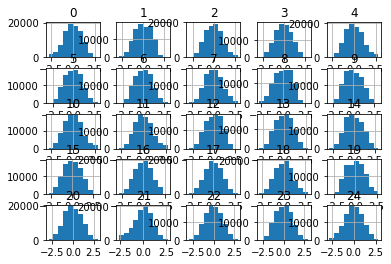

In [365]:
df_X_REF_25 = pd.DataFrame(data=X_RFE_25)
df_X_REF_25.hist()
plt.show

# Feature selection 1 in descision tree

In [321]:
#we can take 25 -- X_RFE_25

validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_RFE_25, Y, test_size = validation_size, random_state = seed)
print(X_train, X_test, Y_train, Y_test)

[[ 0.70230867 -0.61212985  0.51654247 ... -0.37875703 -0.21319885
   1.07561585]
 [ 1.83663527  0.97330745 -0.7109556  ... -0.8644344  -0.17213992
   0.8909392 ]
 [-1.33094806  0.95765147  0.83734737 ...  0.09876679  0.05699664
  -2.21979438]
 ...
 [ 1.13413216 -0.02744593 -1.82683405 ...  0.9779169   0.34486693
  -2.30944465]
 [-0.12184227 -0.65952908 -0.2727753  ... -0.43365059 -0.64877449
  -1.03981085]
 [ 1.73499876 -0.909119   -1.20510461 ...  0.07955713  0.40351165
  -0.78059516]] [[-4.30964701e-01 -1.15765226e+00 -1.33459185e+00 ...  4.80646881e-01
   1.48945618e+00  6.08475466e-01]
 [-3.96208176e-01  9.95411273e-01  1.01556447e+00 ... -7.90858917e-01
   7.80506138e-01  1.72496278e+00]
 [ 5.52750287e-01  7.49314831e-01  2.16218237e-01 ... -7.60909780e-01
   3.70463592e-01 -1.20448675e-03]
 ...
 [-6.05800556e-01 -6.72705113e-01  1.99002040e+00 ... -4.77542180e-03
   4.17638766e-01 -9.79075336e-01]
 [ 1.21312427e+00 -1.51769661e+00  7.86110400e-01 ... -1.84377559e+00
   8.30008282

In [322]:
desicion_tree = DecisionTreeClassifier()
desicion_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [323]:
Y_pred=desicion_tree.predict(X_test)

In [324]:
print(Y_pred)

[1 1 1 ... 0 1 1]


In [325]:
Y_test.count()

target    18300
dtype: int64

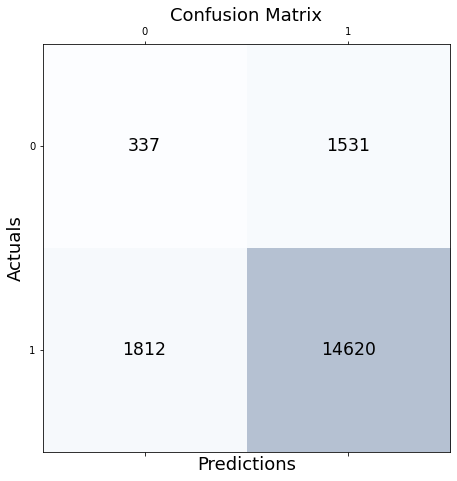

In [326]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#337+14620 / 18300 = 81.7%

In [327]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.50)
X_Variance = selector.fit_transform(X)

In [328]:
print(X_Variance.shape)

(91497, 46)


In [329]:
X.shape

(91497, 46)

In [330]:
_ = selector.fit(X_dataframe)

# Get the boolean mask
mask = selector.get_support()

ansur_reduced = X_dataframe.loc[:, mask]

In [331]:
ansur_reduced

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item38,item39,item40,item41,item42,item43,item44,d,f,h
0,-1.349368,0.712841,0.955624,1.013913,0.141393,0.397555,1.796556,0.633902,-1.097677,-0.291592,...,0.466020,-0.536881,0.449490,1.210982,0.625740,-0.578228,-2.224153,1.355240,-1.173657,-0.270305
1,-1.056186,-1.227732,1.047404,1.592927,-0.377050,0.055529,0.180507,0.605937,0.332769,-0.886559,...,-0.556121,0.757216,0.765974,0.568983,-0.776795,0.466543,0.983641,-0.737876,0.852037,-0.270305
2,0.548104,1.646528,1.072807,0.314006,-0.251765,0.571709,-0.492039,1.092805,0.841997,1.761571,...,0.483861,-1.265006,0.554668,-0.714732,0.399674,0.163745,0.225173,-0.737876,0.852037,-0.270305
3,0.526970,-2.227772,-0.220321,0.607075,0.281262,-0.309147,0.463337,-0.763197,0.293903,0.695007,...,-0.809666,1.460296,1.094124,1.118608,-1.093631,0.528634,-0.173676,1.355240,-1.173657,-0.270305
4,0.099548,-0.241910,-1.210637,0.255982,-0.197315,-0.808197,-0.017501,2.012045,0.142164,0.734959,...,-0.926713,-0.048976,1.045946,1.255014,0.348765,-0.245459,1.884648,-0.737876,0.852037,-0.270305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91492,-1.063541,-0.199255,-0.703154,0.442117,-1.131410,0.406881,0.264900,0.278117,-1.608424,-0.452819,...,-0.823440,0.490365,-0.887221,-0.291132,-2.042926,0.697841,-0.478952,1.355240,-1.173657,-0.270305
91493,-1.459634,2.049914,-1.132184,-1.785098,-1.199631,-1.457229,-1.902859,-0.203864,-0.079122,-1.704902,...,-0.015633,-0.699941,1.155517,-0.695567,0.997646,0.977714,-0.072111,-0.737876,0.852037,-0.270305
91494,0.469859,-0.770631,0.255009,1.692785,-0.421860,-1.654222,0.177571,-0.846423,-0.563796,-1.068996,...,0.489831,-1.758684,-1.360120,-0.832134,0.161409,-0.099597,-1.847971,-0.737876,0.852037,-0.270305
91495,0.668294,0.985627,-0.430167,0.132144,0.453688,1.313812,-0.319888,-1.724593,-0.491553,0.889342,...,0.687742,-1.448643,0.520124,1.597689,1.086525,-0.337647,1.004273,-0.737876,0.852037,-0.270305


<function matplotlib.pyplot.show(close=None, block=None)>

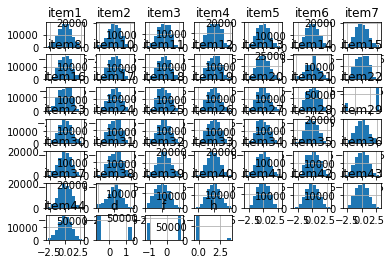

In [363]:
ansur_reduced.hist()
plt.show

# Feature selection 2 in desicion tree

In [332]:
#we can take ansur_reduced

validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(ansur_reduced, Y, test_size = validation_size, random_state = seed)
print(X_train, X_test, Y_train, Y_test)

          item1     item2     item3     item4     item5     item6     item7  \
1783  -0.226720  0.702309 -0.612130 -0.670754  0.516542 -0.536974  0.775122   
86416 -0.243018  1.836635  0.973307 -0.114105 -0.710956  0.890134  0.386396   
83545  0.152517 -1.330948  0.957651  0.845822  0.837347  0.269081 -0.315271   
71678  1.848527  1.109908  0.690637  0.734995 -1.227316 -0.145462 -0.521886   
75367 -0.236357 -0.374617 -1.235242  0.653181 -0.553855 -1.599787 -1.221277   
...         ...       ...       ...       ...       ...       ...       ...   
41295 -0.312235 -0.996022 -0.535597 -0.491741 -0.478712  1.482066  1.348566   
64877 -0.639602  1.635469 -0.087806 -0.460022 -1.725773 -1.156314  0.795075   
4714   0.680501  1.134132 -0.027446  1.409689 -1.826834  0.727210  0.293230   
41187  2.150957 -0.121842 -0.659529  0.599477 -0.272775 -0.524032 -0.308279   
31626 -0.729022  1.734999 -0.909119  0.571842 -1.205105 -1.484065  1.674302   

          item8    item10    item11  ...    item38 

In [333]:
desicion_tree = DecisionTreeClassifier()
desicion_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [334]:
Y_pred=desicion_tree.predict(X_test)

In [335]:
print(Y_pred)

[1 1 1 ... 0 1 1]


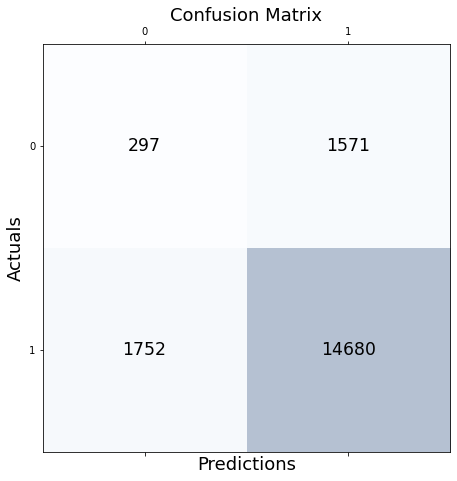

In [336]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#297+14680 / 18300 = 81.8%

# using feature selection 1 in kmeans 

In [ ]:
#as K means is an unsupervised learning we dont need to split data into training and testing set

In [337]:
#spot check algorithms
from sklearn import model_selection

Features = []
Features.append(('X_RFE',X_RFE))
Features.append(('X_RFE_10',X_RFE_10))
Features.append(('X_RFE_15',X_RFE_15))
Features.append(('X_RFE_20',X_RFE_20))
Features.append(('X_RFE_21',X_RFE_21))
Features.append(('X_RFE_22',X_RFE_22))
Features.append(('X_RFE_23',X_RFE_23))
Features.append(('X_RFE_24',X_RFE_24))
Features.append(('X_RFE_25',X_RFE_25))
Features.append(('X_RFE_30',X_RFE_30))
Features.append(('X_RFE_34',X_RFE_34))
Features.append(('X_RFE_35',X_RFE_35))
Features.append(('X_RFE_36',X_RFE_36))
Features.append(('X_RFE_40',X_RFE_40))
Features.append(('X_RFE_45',X_RFE_45))
Features.append(('X_RFE_all',X))

#evaluate each model in turn
results = []
names = []

for name, X_feature in Features:
    kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results = model_selection.cross_val_score(KMeans(), X_feature, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

X_RFE: 0.120725 (0.006094)
X_RFE_10: 0.124649 (0.009114)
X_RFE_15: 0.128168 (0.010555)
X_RFE_20: 0.123764 (0.009556)
X_RFE_21: 0.123501 (0.006492)
X_RFE_22: 0.132955 (0.010532)
X_RFE_23: 0.125600 (0.008609)
X_RFE_24: 0.130135 (0.009403)
X_RFE_25: 0.124736 (0.007820)
X_RFE_30: 0.122201 (0.005305)
X_RFE_34: 0.124889 (0.010044)
X_RFE_35: 0.121720 (0.005909)
X_RFE_36: 0.127993 (0.006808)
X_RFE_40: 0.120572 (0.004367)
X_RFE_45: 0.119404 (0.023349)
X_RFE_all: 0.140375 (0.027960)


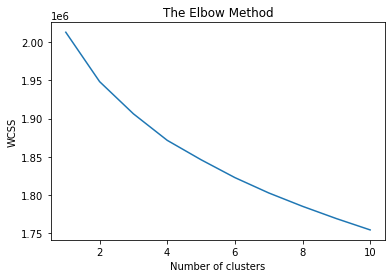

In [348]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_RFE_22)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [349]:
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_RFE_22)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ansur_reduced, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.01546929147787059
For n_clusters=3, the silhouette score is 0.013128067273867106
For n_clusters=4, the silhouette score is 0.012341271948649535
For n_clusters=5, the silhouette score is 0.011572900263706125
For n_clusters=6, the silhouette score is 0.011428602511419068
For n_clusters=7, the silhouette score is 0.011319779848809271
For n_clusters=8, the silhouette score is 0.01115788628322018


In [350]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X_RFE_22)

array([1, 0, 0, ..., 1, 0, 1])

In [351]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1])

In [352]:
Y_df =pd.DataFrame(data=kmeans.labels_)

In [353]:
Y_df.count()

0    91497
dtype: int64

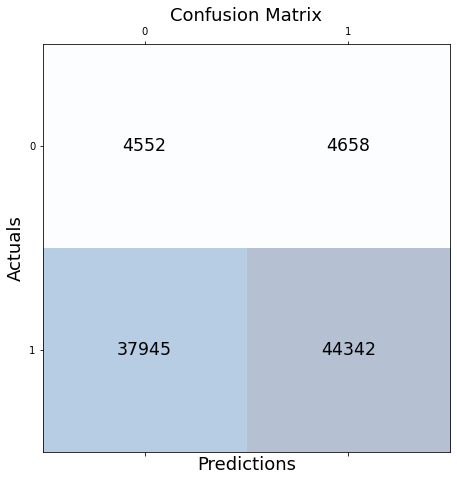

In [354]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=Y, y_pred=kmeans.labels_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#true posetive and true negative by total y (4552+44342 / 91497)= 53.4%

In [355]:
#K-means is a clustering algorithm that can be used to group data points into k clusters based on their feature values. It is an unsupervised learning algorithm, meaning that it does not require labeled training data.

#One way to use k-means for feature selection is to cluster the data points using only a subset of the features, and then measure the quality of the clustering using some evaluation metric. This can be repeated for different subsets of features, and the subset that leads to the best clustering can be selected as the most relevant features.

#Another way to use k-means for feature selection is to cluster the data points using all of the features, and then for each cluster, compute the mean and variance of each feature. Features that have a high mean and variance within a cluster may be more relevant for distinguishing that cluster from the others, and can be selected as important features.

#t is important to note that k-means is sensitive to the initial conditions and can converge to different solutions depending on the starting points of the cluster centers. Therefore, it is recommended to run the algorithm multiple times with different initializations and select the solution that leads to the best clustering.





# using feature selection 2 in kmeans

In [ ]:
#as K means is an unsupervised learning we dont need to split data into training and testing set

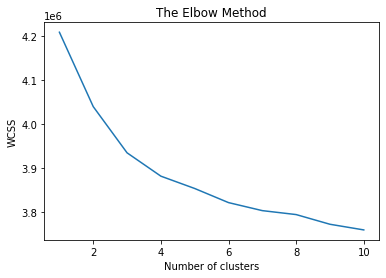

In [356]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ansur_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [357]:
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ansur_reduced)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ansur_reduced, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.04388589104312912
For n_clusters=3, the silhouette score is 0.050513762608521535
For n_clusters=4, the silhouette score is 0.03718630846421852
For n_clusters=5, the silhouette score is 0.027454449846967394
For n_clusters=6, the silhouette score is 0.02192632805834125
For n_clusters=7, the silhouette score is 0.01999629035397512
For n_clusters=8, the silhouette score is 0.018881518766173038


In [358]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X)

array([0, 1, 1, ..., 1, 1, 1])

In [359]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [360]:
Y_df =pd.DataFrame(data=kmeans.labels_)

In [361]:
Y_df.count()

0    91497
dtype: int64

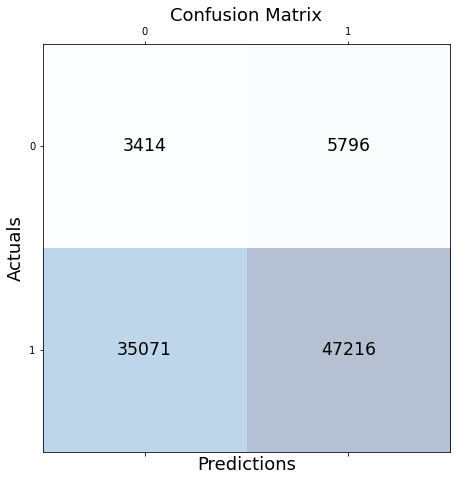

In [362]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=Y, y_pred=kmeans.labels_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#(3414+47216/ 91597) = 55.2%